<a href="https://colab.research.google.com/github/RahafAlshahrany/Capstone_Project/blob/main/capston2/Churn%20Prediction_Student_Notebook_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

In [3]:
Rahaf = 'HR_Dataset.csv'
Husam = '/content/drive/MyDrive/Colab Notebooks/Datasets/HR_Dataset.csv'
Afnan = '/content/drive/MyDrive/Capstone_Pro_1/Project_two/HR_Dataset.csv'

In [4]:
df = pd.read_csv(Husam)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 1. Exploratory Data Analysis

In [7]:
df.shape

(14999, 10)

In [8]:
df.size

149990

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [11]:
df2 = df.copy()

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

## 2. Data Visualization

Questions
* Left vs promotion_last_5years
* Left vs work_accident
* Left vs number_projects
* Departments vs salary
* Left vs departments
* average time spended in company
* Left vs ALL FEATURES

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [16]:
is_left = df[df['left']== 1]
not_left = df[df['left'] == 0]

In [17]:
is_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1995,0.37,0.57,2,147,3,0,1,0,sales,low
1996,0.11,0.92,7,293,4,0,1,0,sales,low
1997,0.41,0.53,2,157,3,0,1,0,sales,low
1998,0.84,0.96,4,247,5,0,1,0,sales,low


In [18]:
df.time_spend_company.value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [19]:
df.number_project.value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [20]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f'Value counts for column: {column}')
    print(value_counts)
    print()

Value counts for column: satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: satisfaction_level, Length: 92, dtype: int64

Value counts for column: last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: last_evaluation, Length: 65, dtype: int64

Value counts for column: number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

Value counts for column: average_montly_hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: average_montly_hours, Length: 215, dtype: int64

Value counts for column: time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

Value counts for col

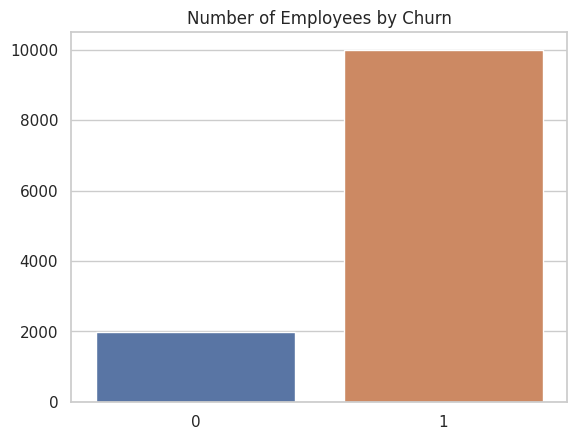

In [21]:
emp = df["left"]
plt.title("Number of Employees by Churn")
sns.barplot(x=emp.unique(), y=emp.value_counts().values)
plt.show()

In [22]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

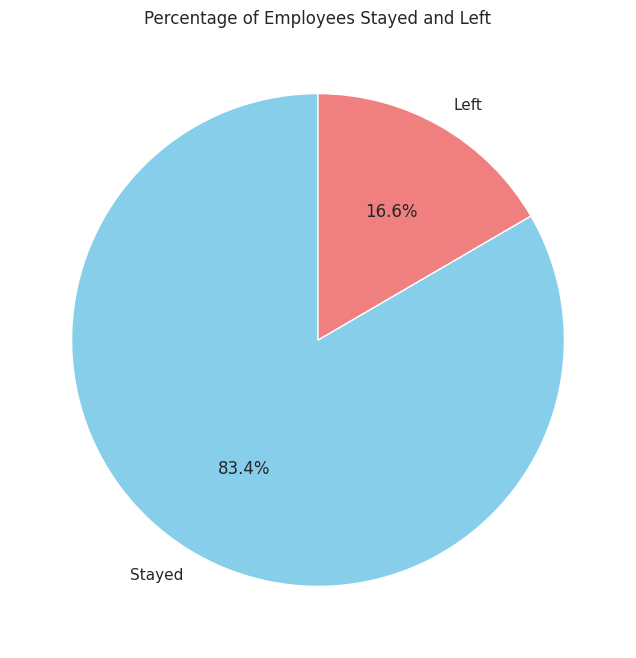

In [23]:
# Replace 0 with 'Stayed' and 1 with 'Left'
df['left'] = df['left'].replace({0: 'Stayed', 1: 'Left'})

# Calculate the percentage of each category in the 'Left' column
left_counts = df['left'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(left_counts, labels=left_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Employees Stayed and Left')
plt.show()

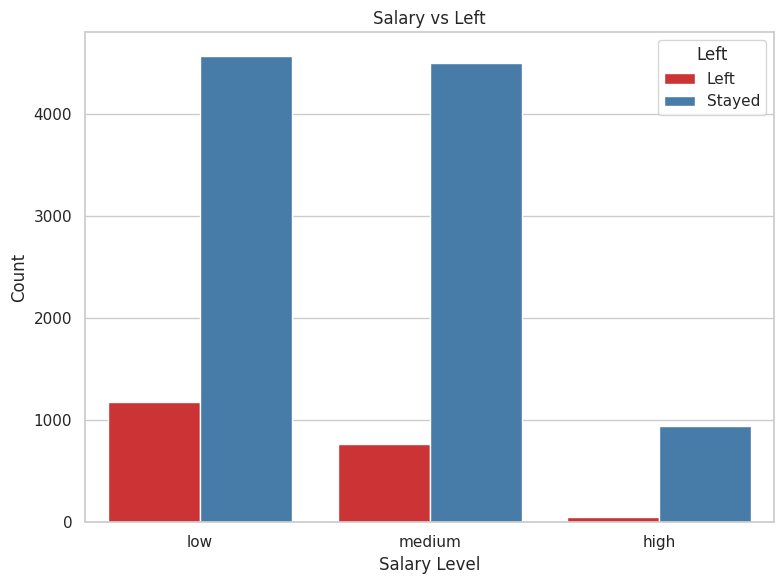

In [24]:
# Set a Seaborn color palette for the count plot
sns.set_palette("Set1")

# Create a count plot for Salary vs Left
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.title('Salary vs Left')
plt.legend(title='Left', loc='upper right')
plt.tight_layout()
plt.show()

TODO: Add the ratio
* 0.048 - high
* 0.14 - medium

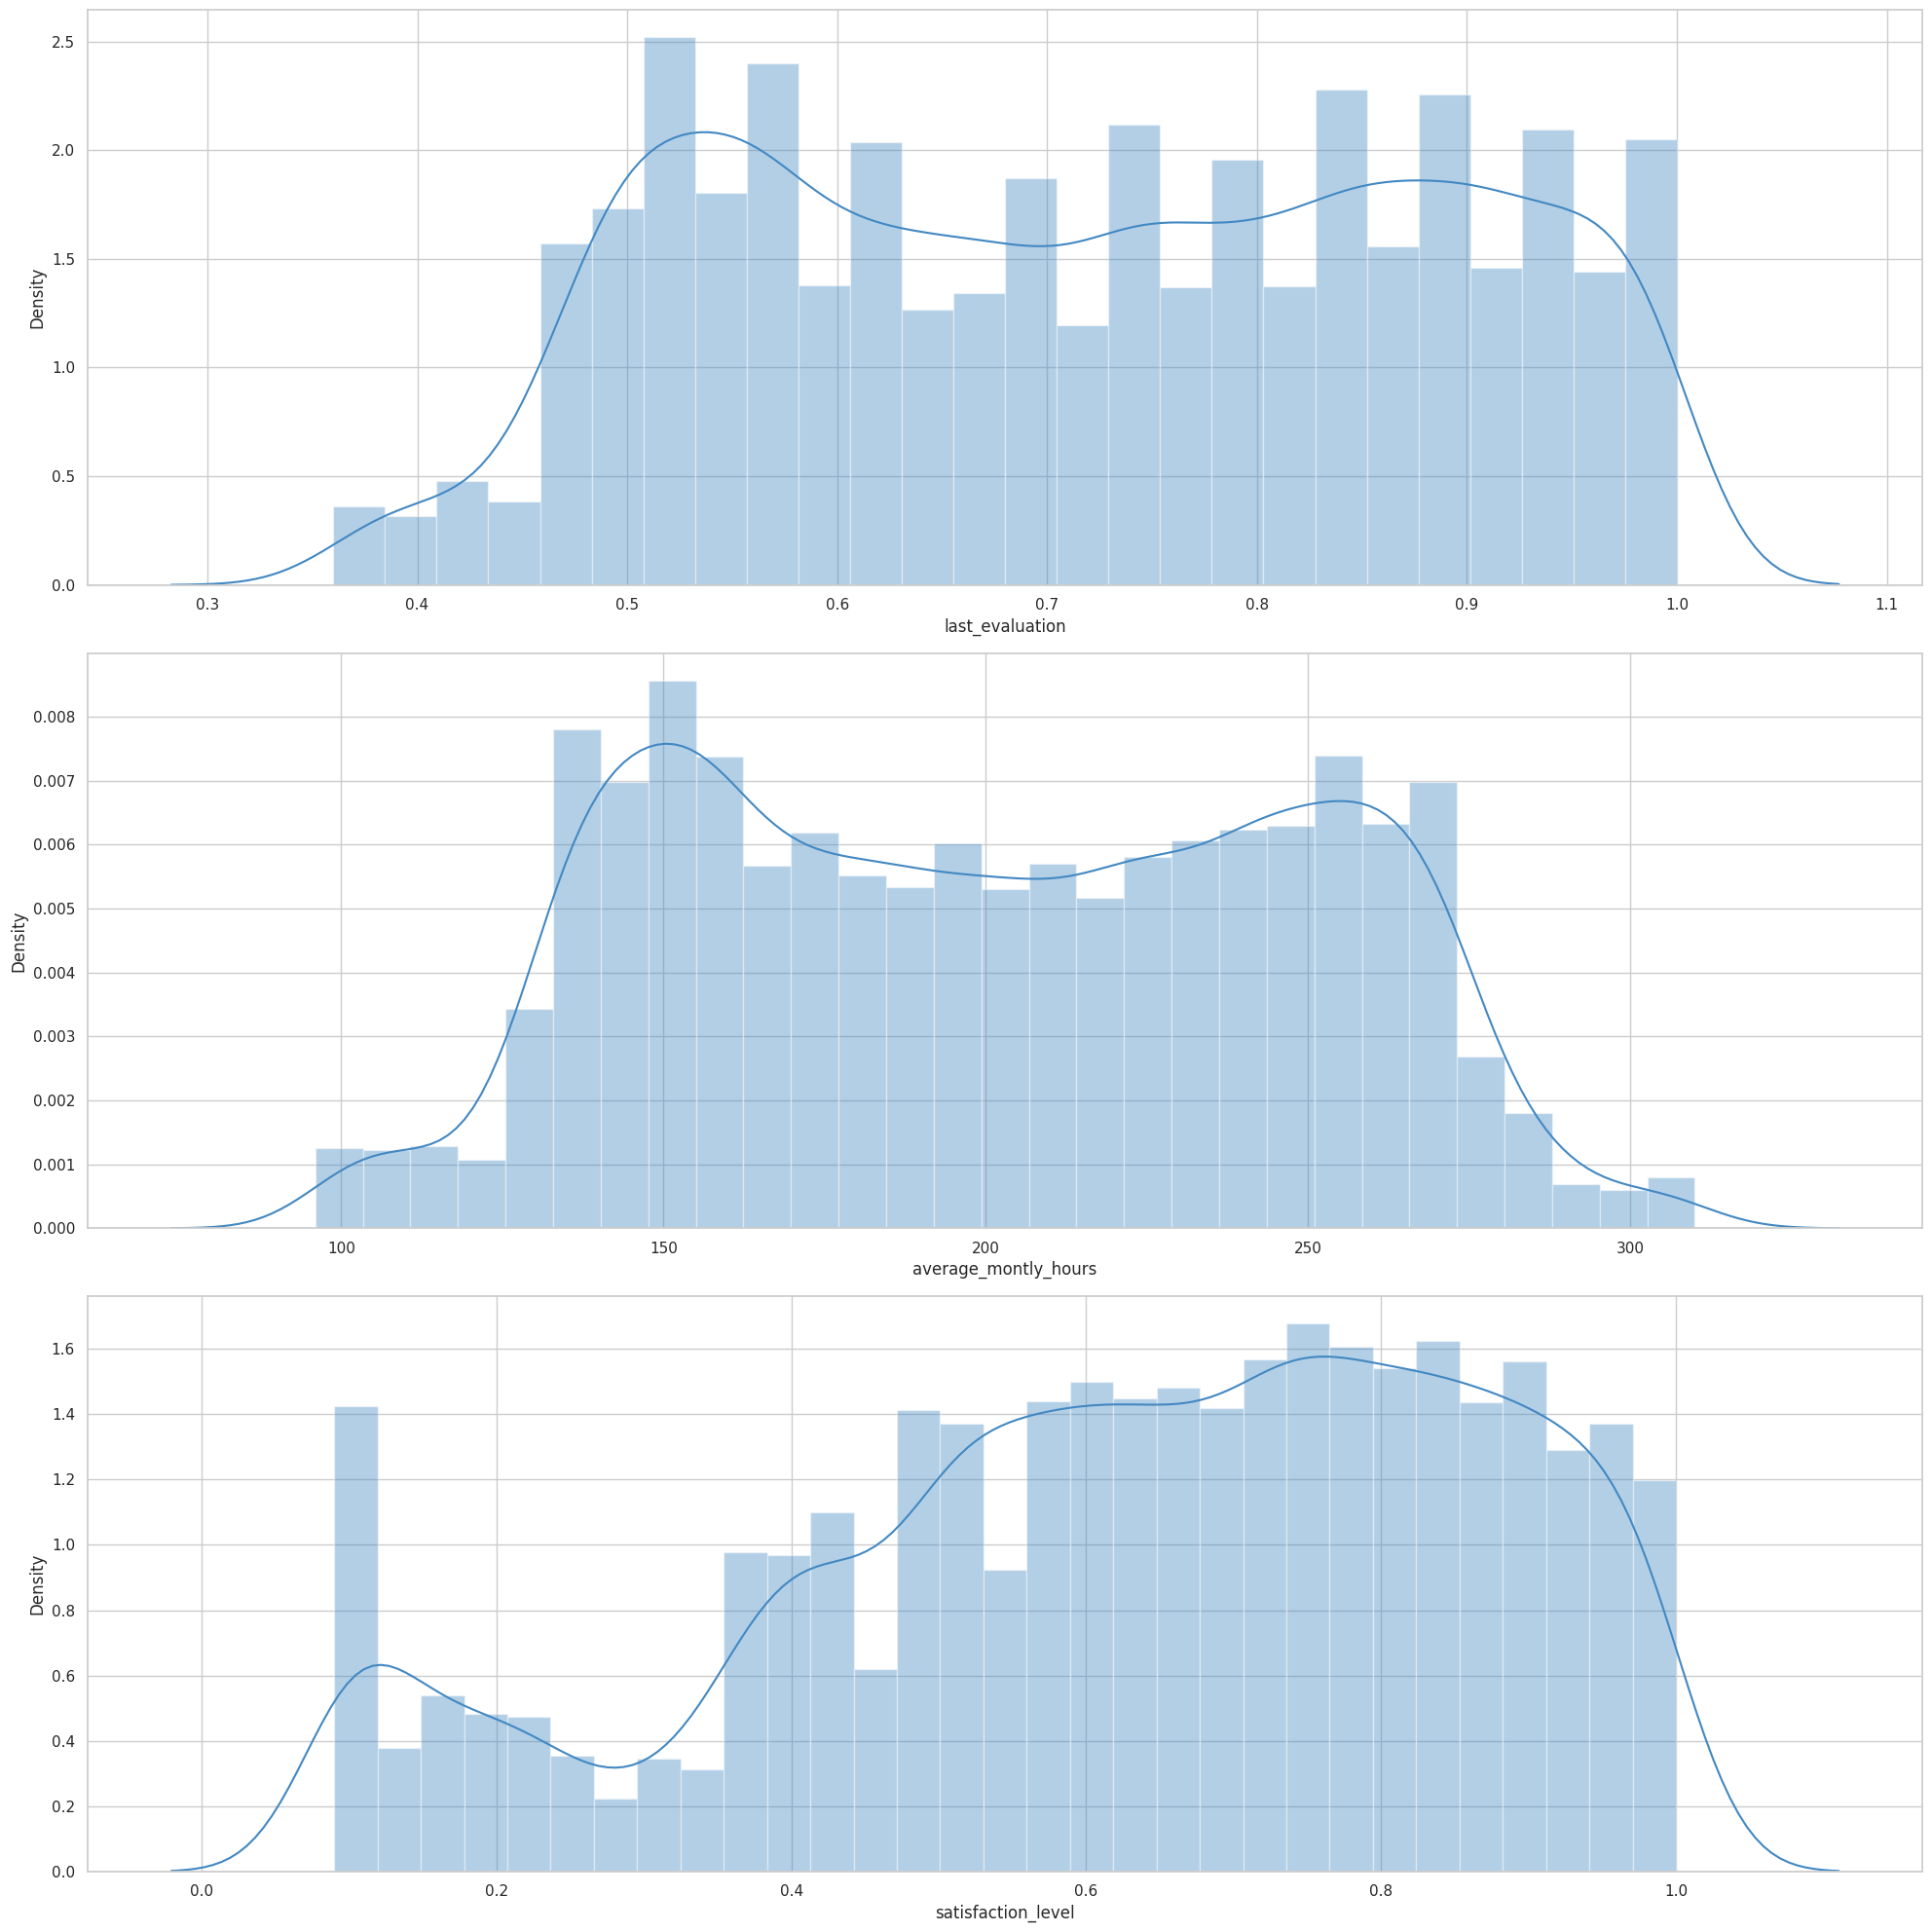

In [25]:
plt.figure(figsize = (20, 20))
column=["last_evaluation","average_montly_hours", 'satisfaction_level']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

In [26]:
# df_sorted = df.sort_values(by='left', ascending=True)
# sns.pairplot(data=df_sorted,hue='left')

<Axes: >

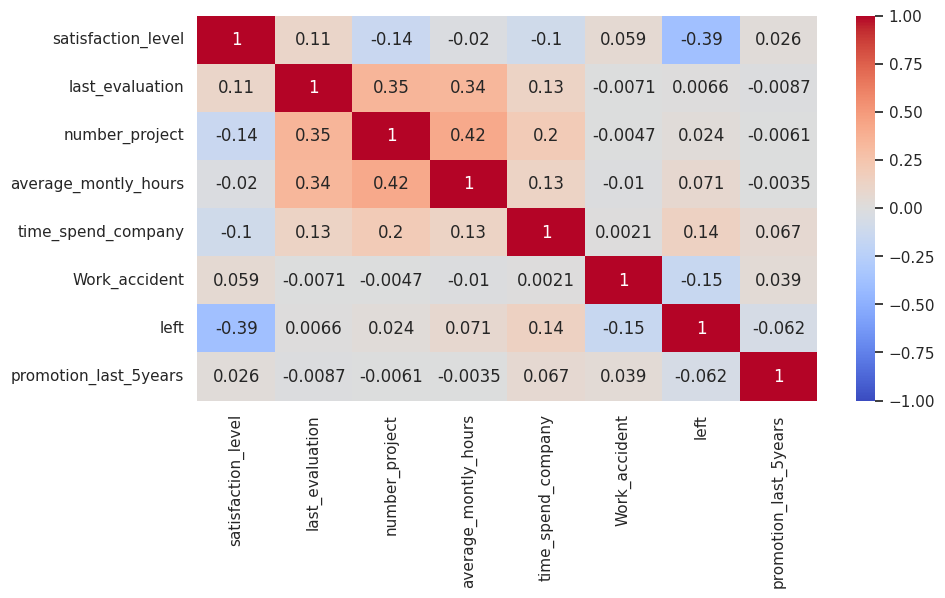

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

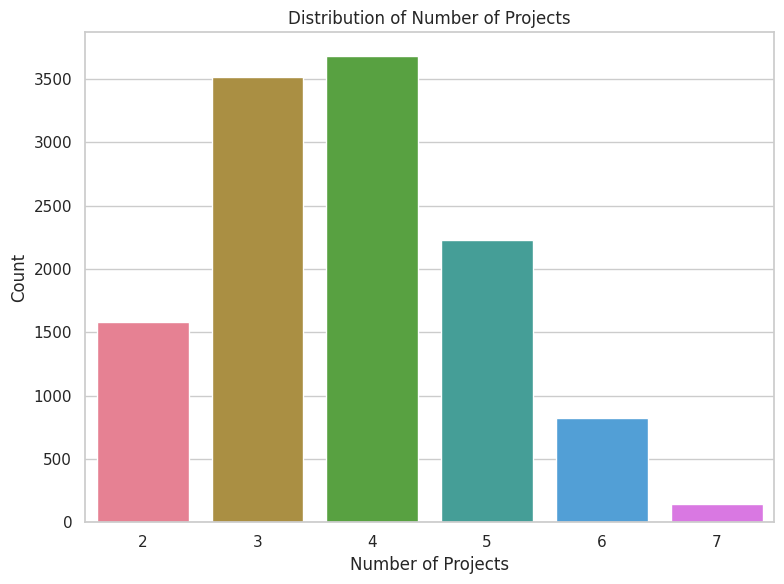

In [28]:
# Set a Seaborn color palette for the count plot
sns.set_palette("husl")

# Create a count plot for number_project
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', data=df)
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Distribution of Number of Projects')
plt.tight_layout()
plt.show()

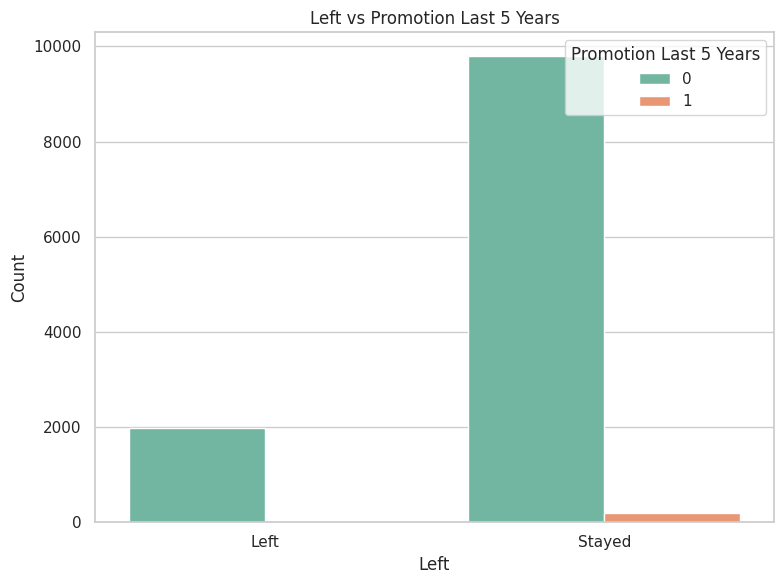

In [29]:
#Left vs promotion_last_5years
# Set a Seaborn color palette for the bar plot
sns.set_palette("Set2")

# Create a bar plot comparing Left vs promotion_last_5years
plt.figure(figsize=(8, 6))
sns.countplot(x='left', hue='promotion_last_5years', data=df)
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Left vs Promotion Last 5 Years')
plt.legend(title='Promotion Last 5 Years', loc='upper right')
plt.xticks(ticks=[0, 1])  # Replace with your actual labels if needed
plt.tight_layout()
plt.show()

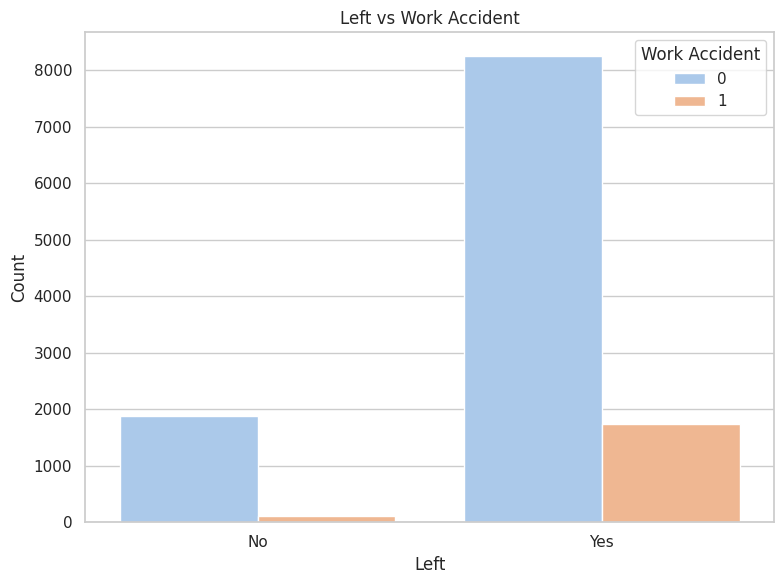

In [30]:
# Set a Seaborn color palette for the bar plot
sns.set_palette("pastel")

# Create a bar plot comparing Left vs work_accident
plt.figure(figsize=(8, 6))
sns.countplot(x='left', hue='Work_accident', data=df)
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Left vs Work Accident')
plt.legend(title='Work Accident', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Replace with your actual labels if needed
plt.tight_layout()
plt.show()

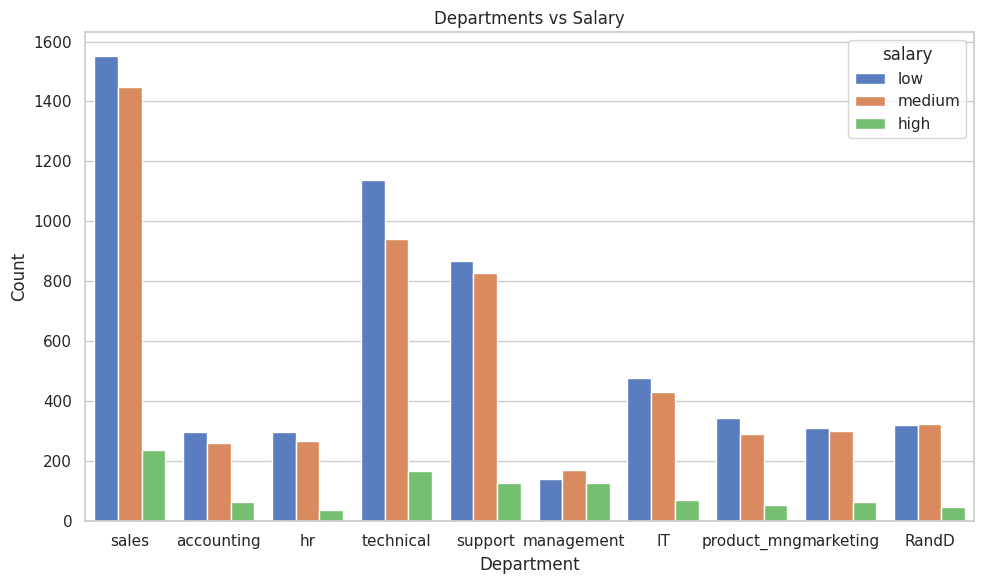

In [31]:
# Set a Seaborn color palette for the count plot
sns.set_palette("muted")

# Create a count plot for Departments vs salary
plt.figure(figsize=(10, 6))
sns.countplot(x='Departments ', hue='salary', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Departments vs Salary')
plt.tight_layout()
plt.show()

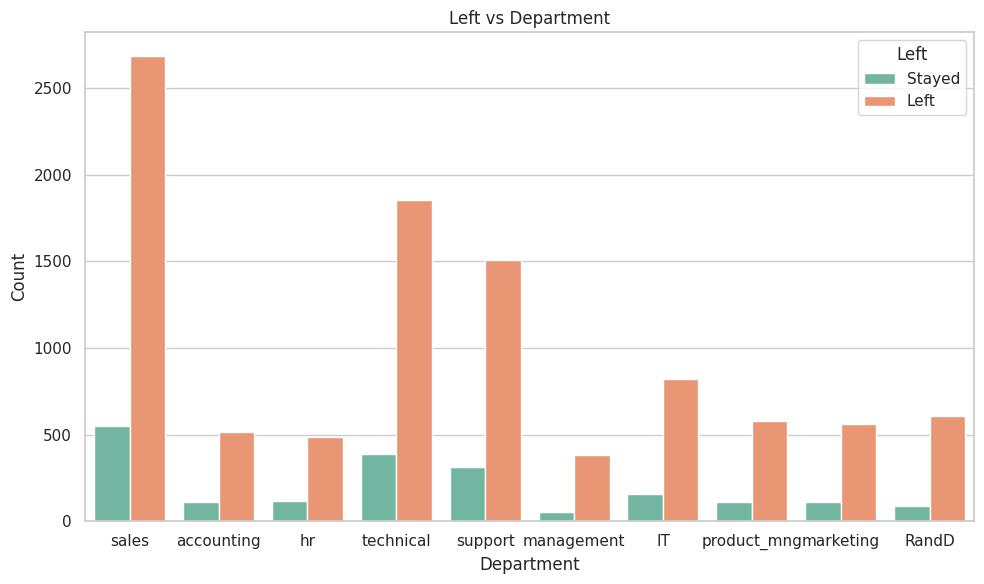

In [32]:
# Set a Seaborn color palette for the count plot
sns.set_palette("Set2")

# Create a count plot for Left vs Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Departments ', hue='left', data=df)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Left vs Department')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

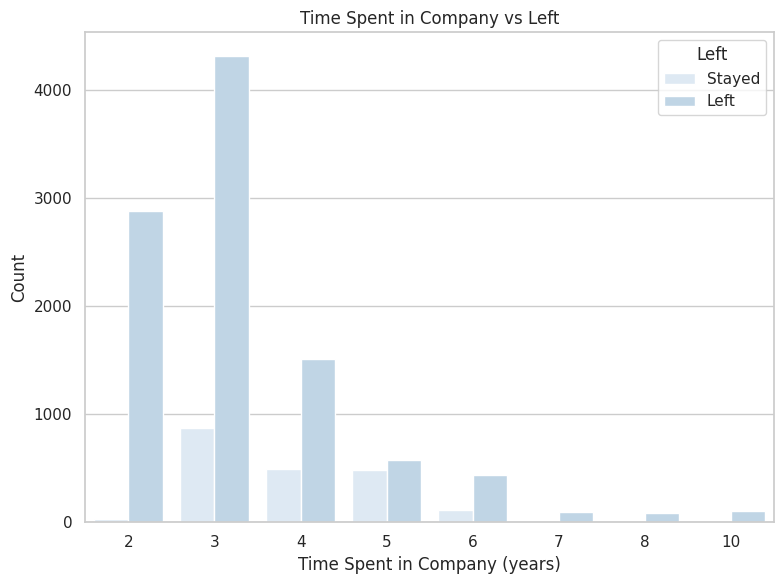

In [33]:
# Set a Seaborn color palette for the bar plot
sns.set_palette("Blues")

# Create a count plot for time_spend_company vs Left
plt.figure(figsize=(8, 6))
sns.countplot(x='time_spend_company', hue='left', data=df)
plt.xlabel('Time Spent in Company (years)')
plt.ylabel('Count')
plt.title('Time Spent in Company vs Left')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

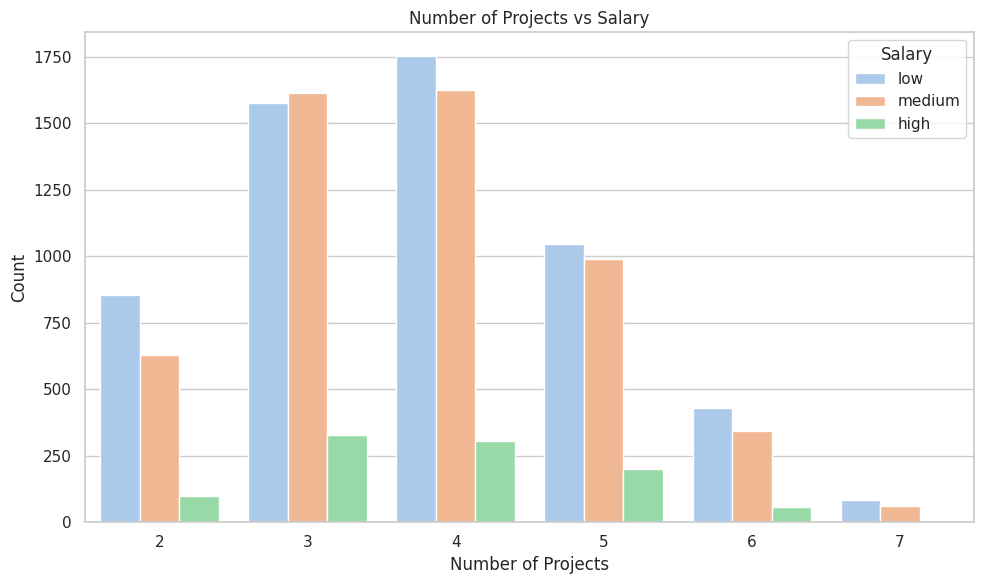

In [34]:
# Set a Seaborn color palette for the count plot
sns.set_palette("pastel")

# Create a count plot for number_project vs salary
plt.figure(figsize=(10, 6))
sns.countplot(x='number_project', hue='salary', data=df)
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Number of Projects vs Salary')
plt.legend(title='Salary', loc='upper right')
plt.tight_layout()
plt.show()

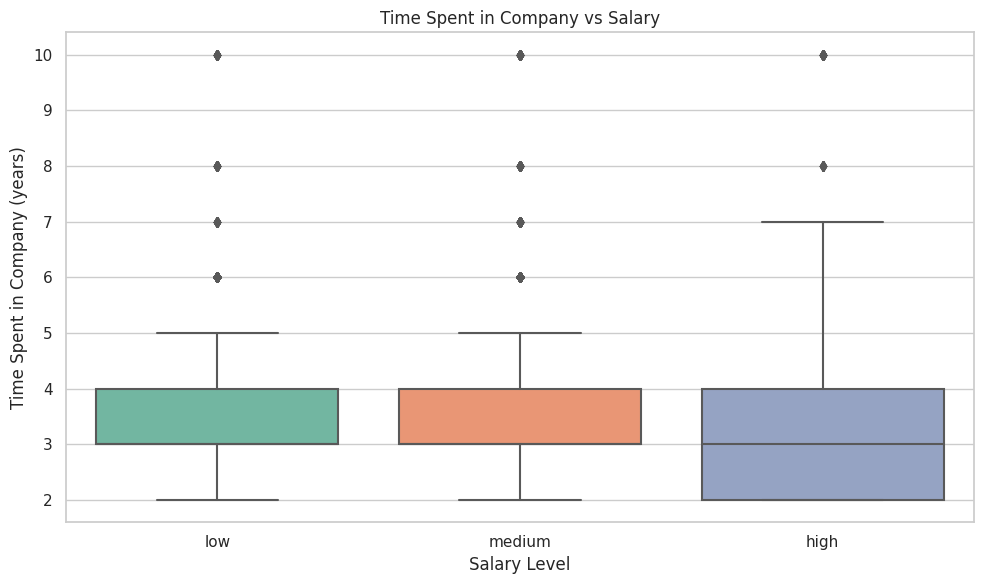

In [35]:
# Create a box plot for time_spend_company vs salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='time_spend_company', data=df, palette="Set2")
plt.xlabel('Salary Level')
plt.ylabel('Time Spent in Company (years)')
plt.title('Time Spent in Company vs Salary')
plt.tight_layout()
plt.show()

## the explanation in the power point

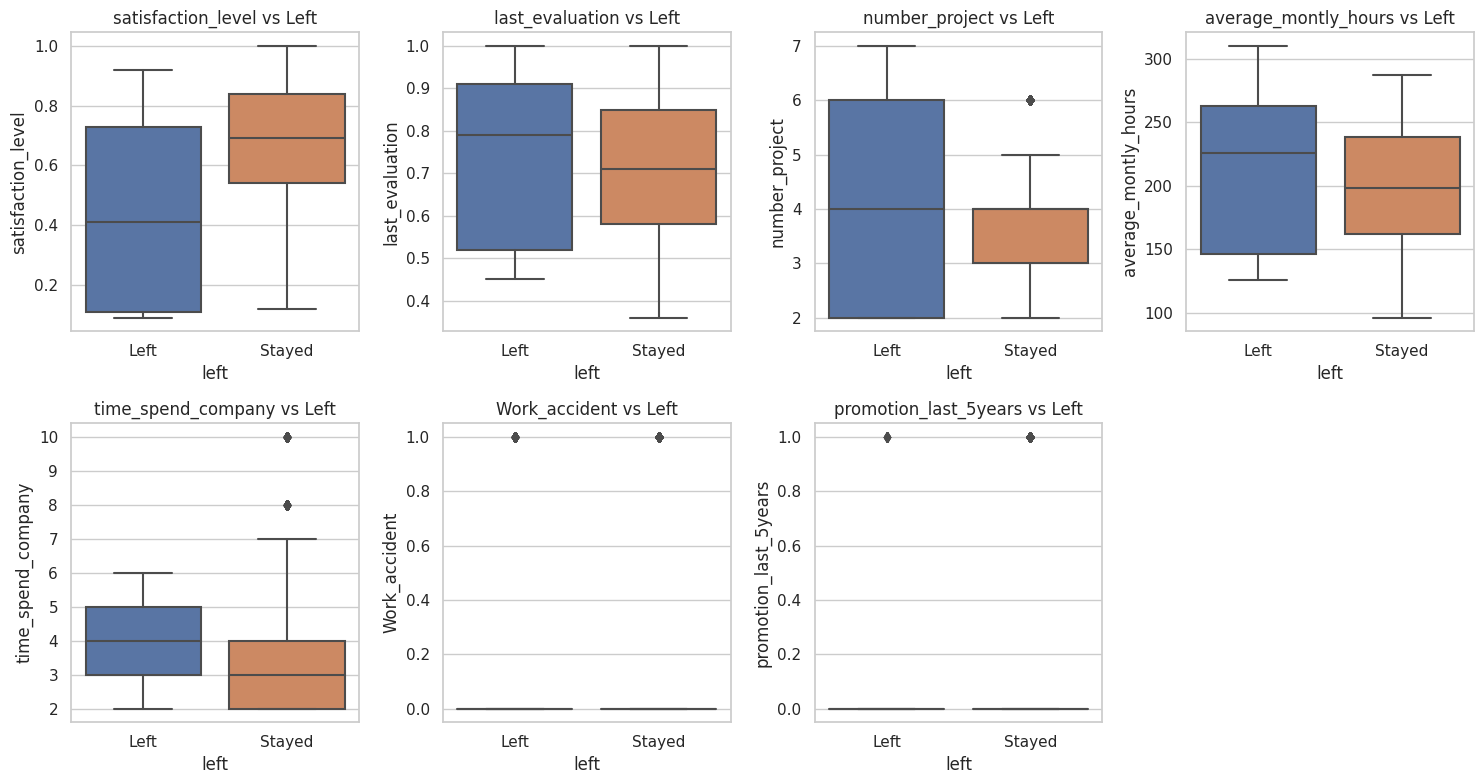

In [36]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='left', y=feature, data=df)
    plt.title(f'{feature} vs Left')

plt.tight_layout()
plt.show()
# satisfication vs Left
# last_evaluation vs Left

### Scaling the data

In [37]:
#convert the left column to numerical using "mapping"
mapping = {'Stayed': 0, 'Left': 1}
df['left'] = df['left'].map(mapping)
print(df['left'])

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64


In [38]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

In [40]:
cat_onehot = ["Departments "]

ordinal = ['salary']
ord_for_salary = ['low', 'medium', 'high']

In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [ord_for_salary],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,ordinal),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [42]:
from sklearn.pipeline import Pipeline
operations = [("encoder", column_trans)]

pipeline = Pipeline(steps=operations)

In [43]:
scaled_df = pipeline.fit_transform(df)

In [44]:
scaled_df

,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,2.241116,-0.131228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,2.241116,-0.131228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,2.241116,-0.131228
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,2.241116,-0.131228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,2.241116,-0.131228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.121472,-0.990180,-0.690216,1.201140,4.988139,2.341286,-0.446206,7.620300
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.457736,1.386026,1.029194,1.344801,4.988139,-0.427116,-0.446206,7.620300
11997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.914054,-1.049585,-0.690216,-0.317563,4.988139,-0.427116,-0.446206,7.620300
11998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.243085,-0.396129,-0.690216,-0.584363,4.988139,-0.427116,-0.446206,7.620300


In [45]:
df_cluster = scaled_df.drop(["left"], axis=1)
df_cluster

,Departments _IT,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,-0.131228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,-0.131228
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,-0.131228
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.374770,0.910785,1.029194,0.462311,1.229261,-0.427116,-0.131228
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,-0.131228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.121472,-0.990180,-0.690216,1.201140,4.988139,2.341286,7.620300
11996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.457736,1.386026,1.029194,1.344801,4.988139,-0.427116,7.620300
11997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.914054,-1.049585,-0.690216,-0.317563,4.988139,-0.427116,7.620300
11998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.243085,-0.396129,-0.690216,-0.584363,4.988139,-0.427116,7.620300


## 4. Cluster Analysis

In [46]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Calculating Hopkins score to know whether the data is good for clustering or not.
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
    return HS

In [47]:
hopkins(df_cluster)

0.8407453077968884

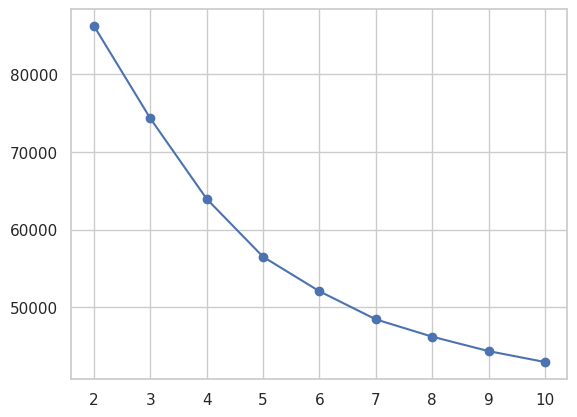

In [48]:
from sklearn.cluster import KMeans

n_clusters = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df_cluster)
    n_clusters.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(2,11),n_clusters,marker='o');

In [49]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_cluster)
    clusterlabels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster, clusterlabels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.18166772796935043
For n_clusters=3, the silhouette score is 0.1846306070233016
For n_clusters=4, the silhouette score is 0.211085443349446
For n_clusters=5, the silhouette score is 0.17999343290958464
For n_clusters=6, the silhouette score is 0.19512619420758184
For n_clusters=7, the silhouette score is 0.17509616000080483
For n_clusters=8, the silhouette score is 0.16723109824274582
For n_clusters=9, the silhouette score is 0.16845714107020585
For n_clusters=10, the silhouette score is 0.16909344477870988


###

Text(0.5, 1.0, 'elbow method')

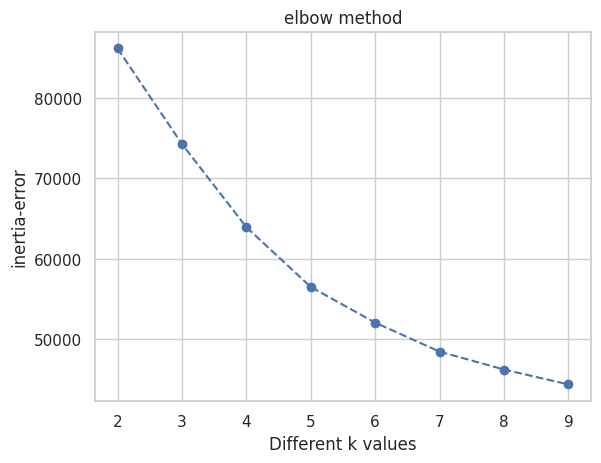

In [50]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_cluster)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [51]:
-pd.Series(ssd).diff()

0             NaN
1    11878.865943
2    10341.534216
3     7433.582285
4     4433.117829
5     3604.883286
6     2224.396336
7     1853.566583
dtype: float64

In [52]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_cluster)
df_cluster["Clusters"]=(kmeans4.labels_+1)

In [53]:
df_cluster.Clusters.value_counts()

3    7120
2    2909
1    1759
4     203
Name: Clusters, dtype: int64

In [54]:
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(df_cluster)
df_cluster["Clusters"]=(kmeans3.labels_+1)

In [55]:
df_cluster.Clusters.value_counts()

2    7292
1    2940
3    1759
Name: Clusters, dtype: int64

In [56]:
df_cluster.columns

Index(['Departments _IT', 'Departments _RandD', 'Departments _accounting',
       'Departments _hr', 'Departments _management', 'Departments _marketing',
       'Departments _product_mng', 'Departments _sales',
       'Departments _support', 'Departments _technical', 'salary',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Clusters'],
      dtype='object')

In [57]:
# time_spend_company
# average_montly_hours
# salary
# last_evaluation
# number_project
# satisfaction_level

## TODO:Afnan

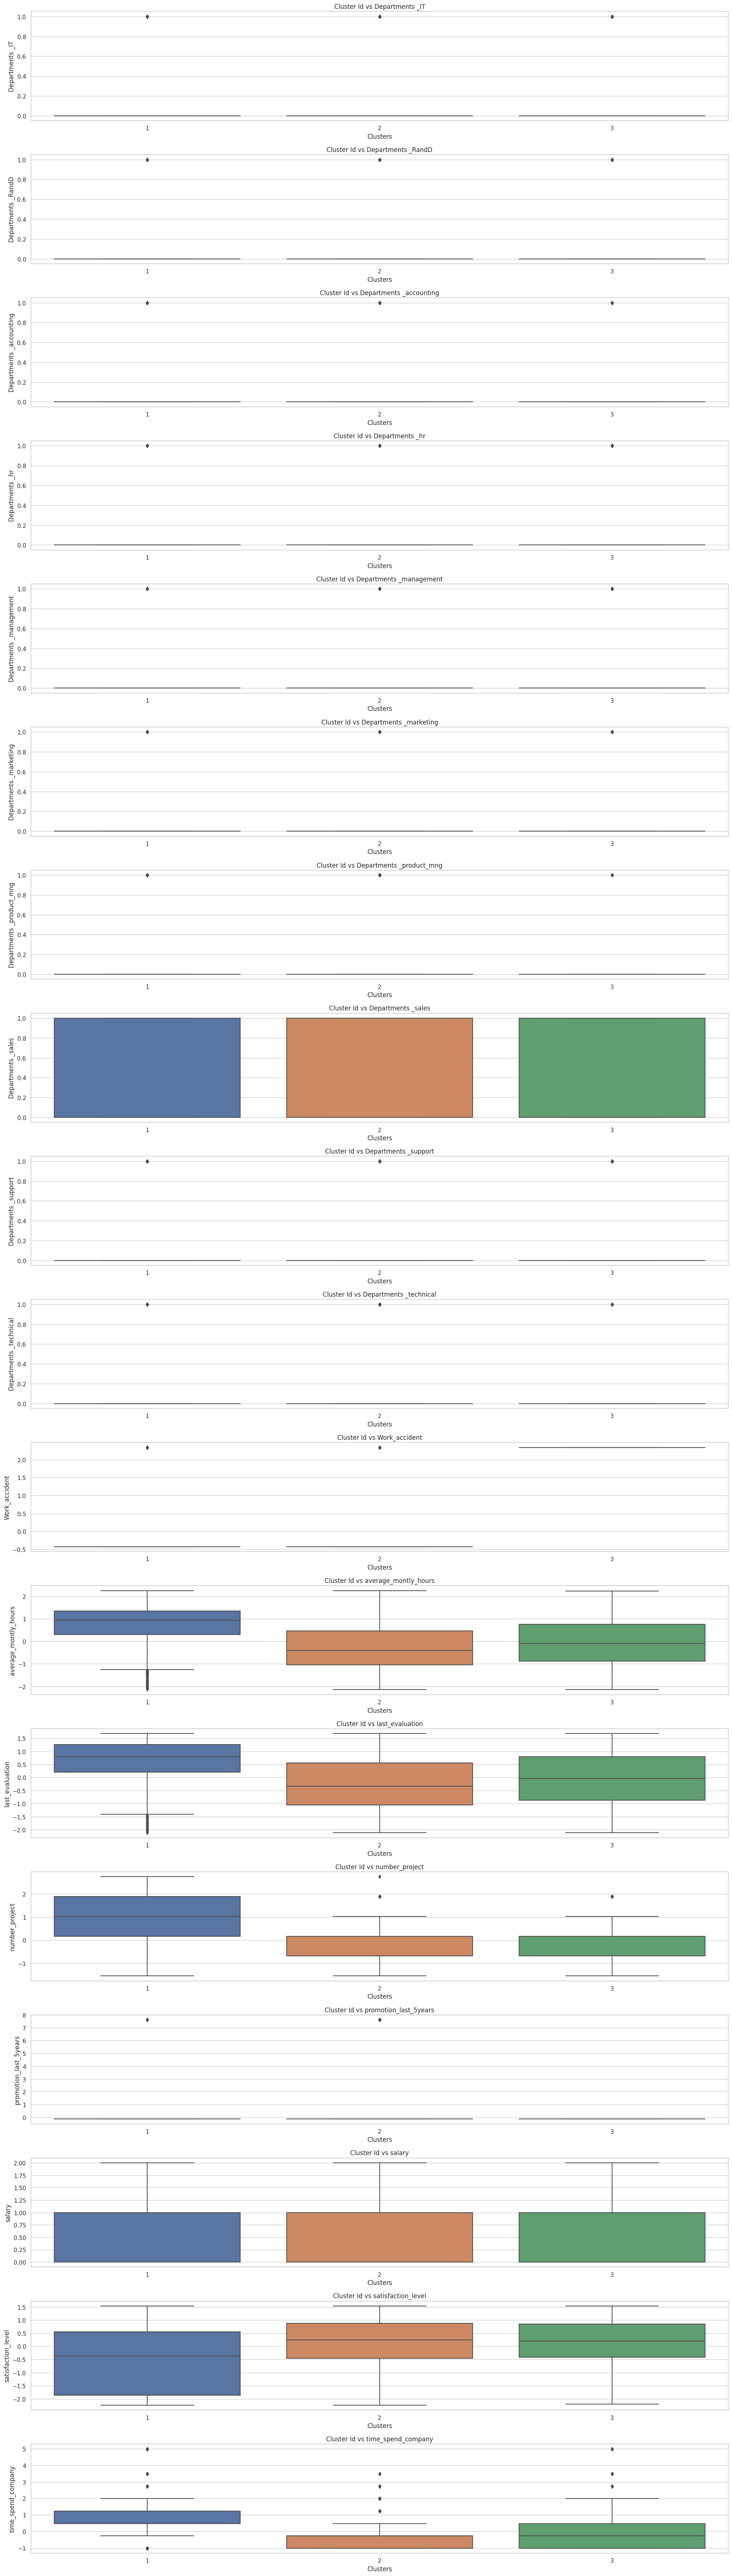

In [58]:
# Set the figure size
plt.figure(figsize=(20, 70))

# Extract features (excluding the 'Clusters' column)
features = df_cluster.columns.difference(['Clusters'])

# Number of clusters
num_clusters = df_cluster['Clusters'].nunique()

# Loop through each feature
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x='Clusters', y=feature, data=df_cluster)
    plt.title(f'Cluster Id vs {feature}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

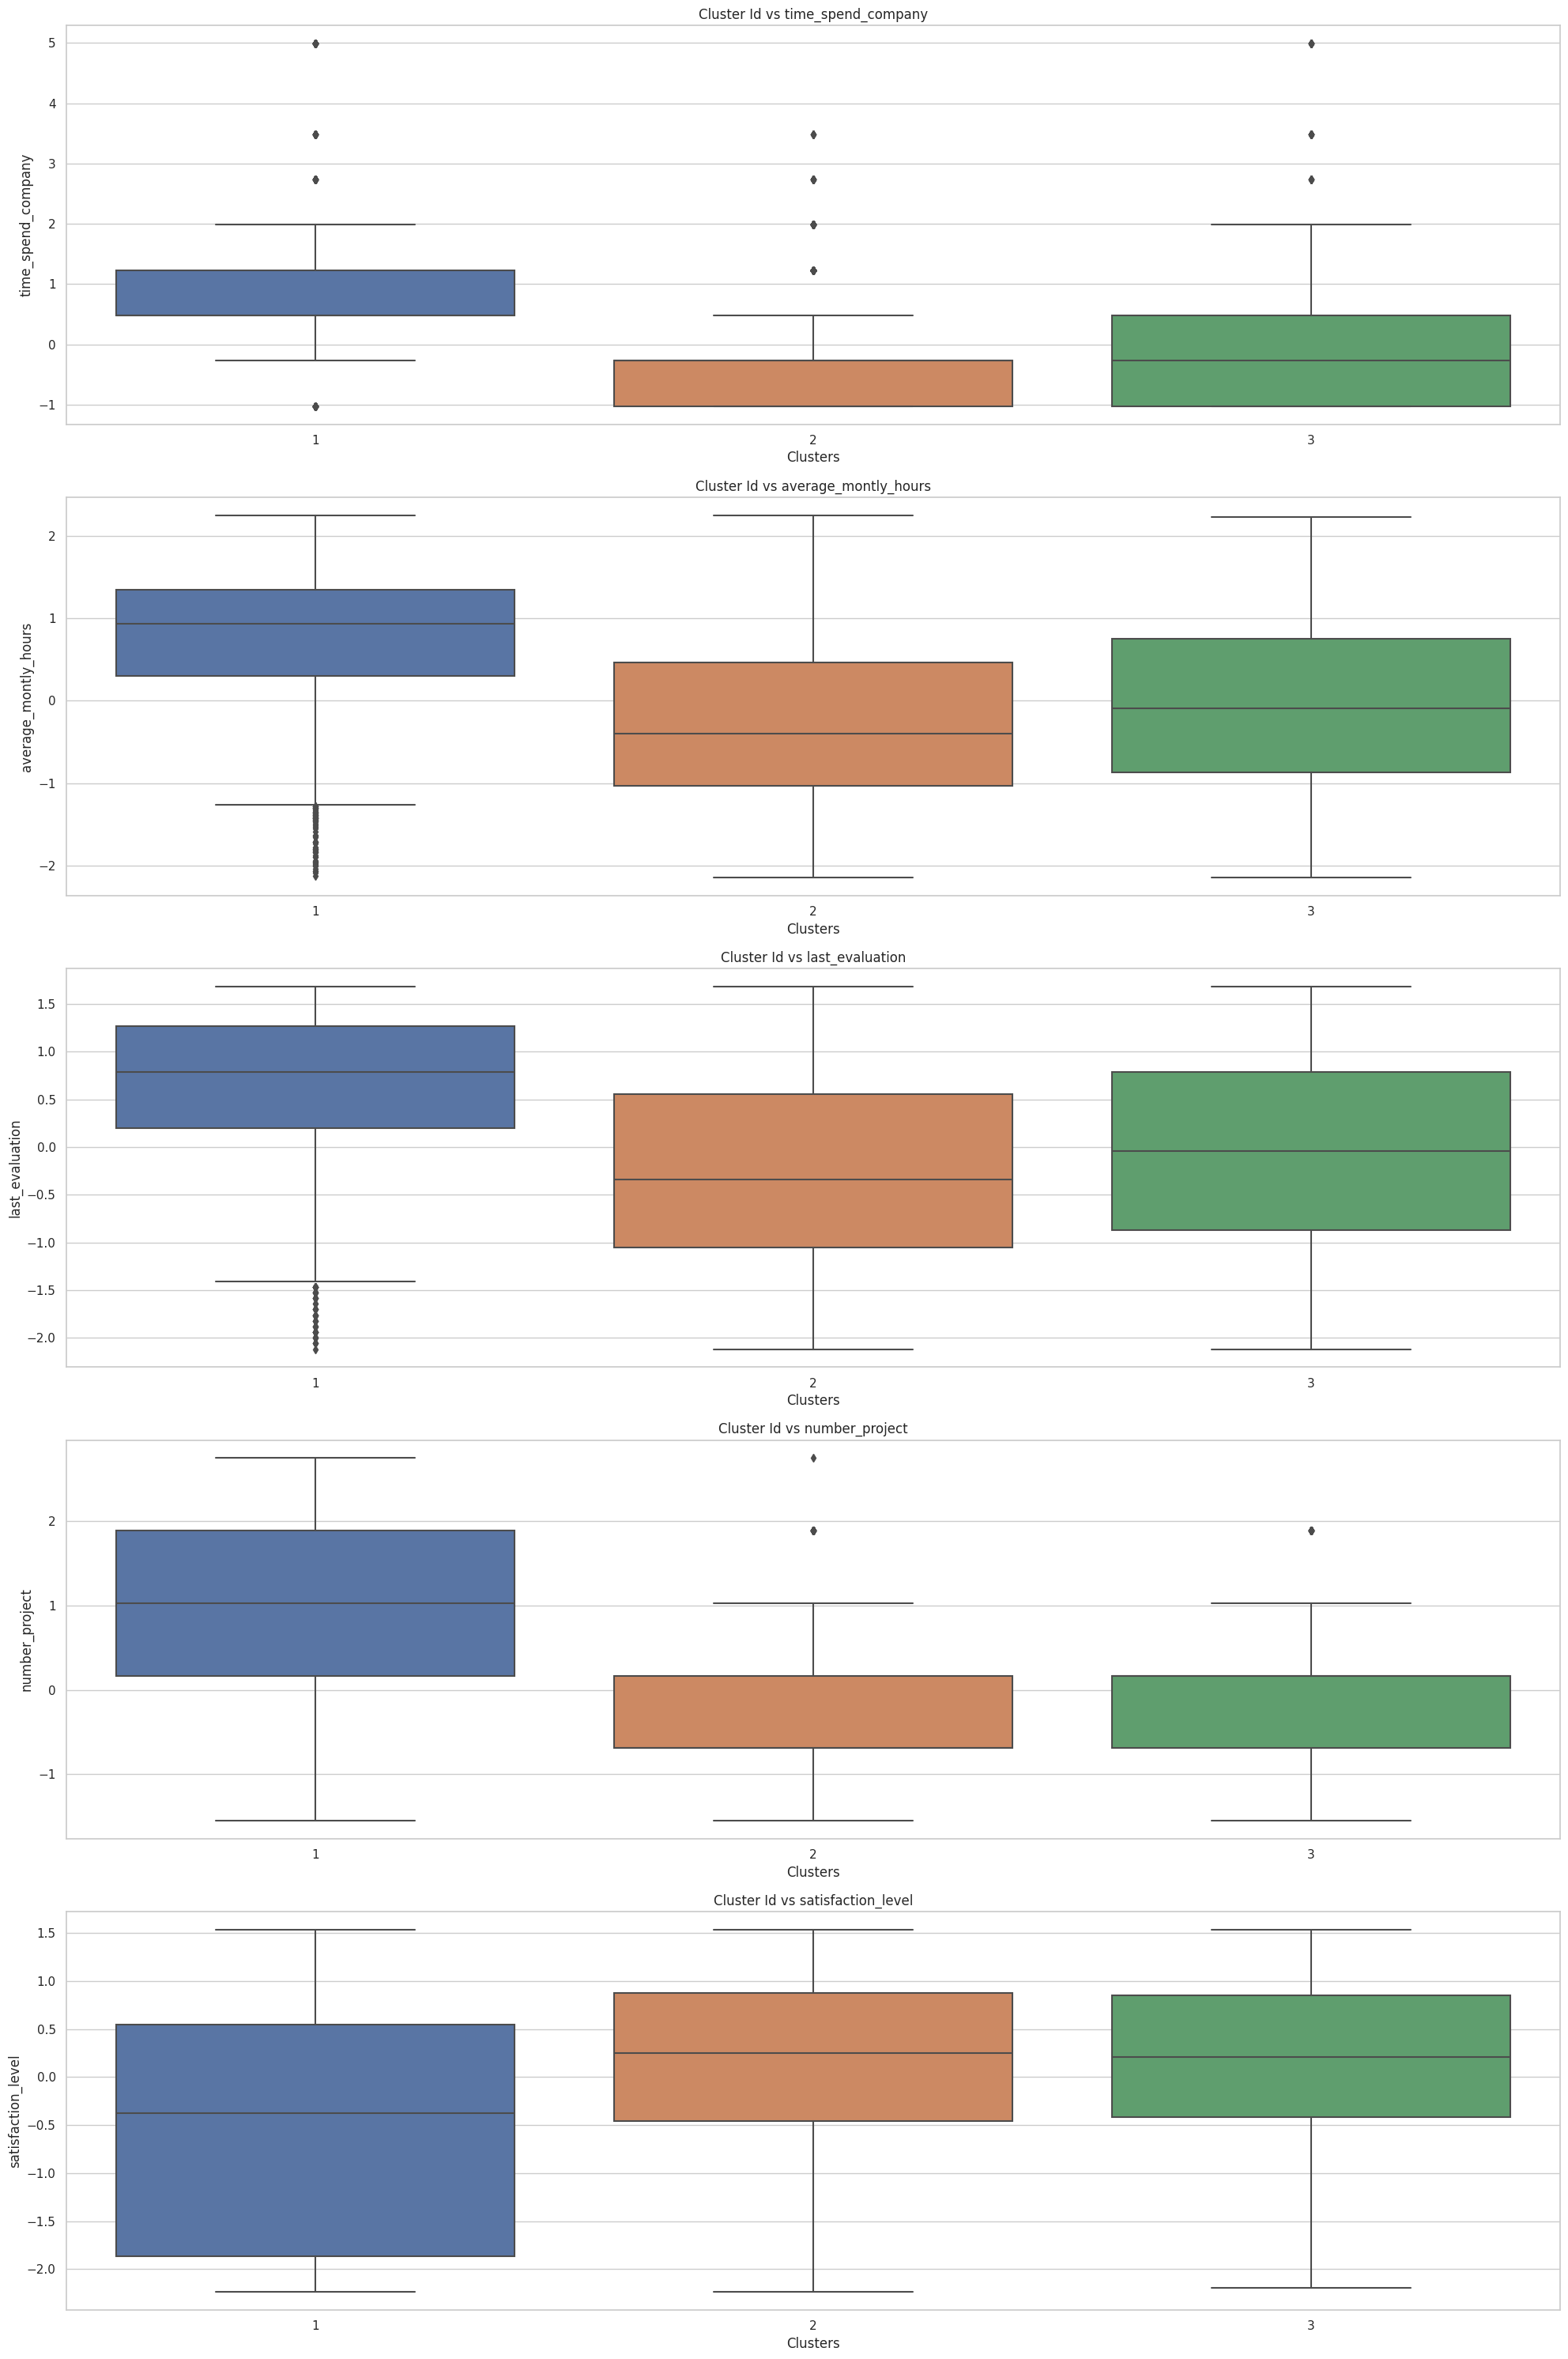

In [59]:
plt.figure(figsize=(20, 30))
# List of specific features
features = ['time_spend_company', 'average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']

# Loop through each feature
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x='Clusters', y=feature, data=df_cluster)
    plt.title(f'Cluster Id vs {feature}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## 4 Clusters

---



In [60]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4.fit(df_cluster)
df_cluster["Clusters"]=(kmeans4.labels_+1)

In [61]:
df_cluster.Clusters.value_counts()

2    7120
3    2909
4    1759
1     203
Name: Clusters, dtype: int64

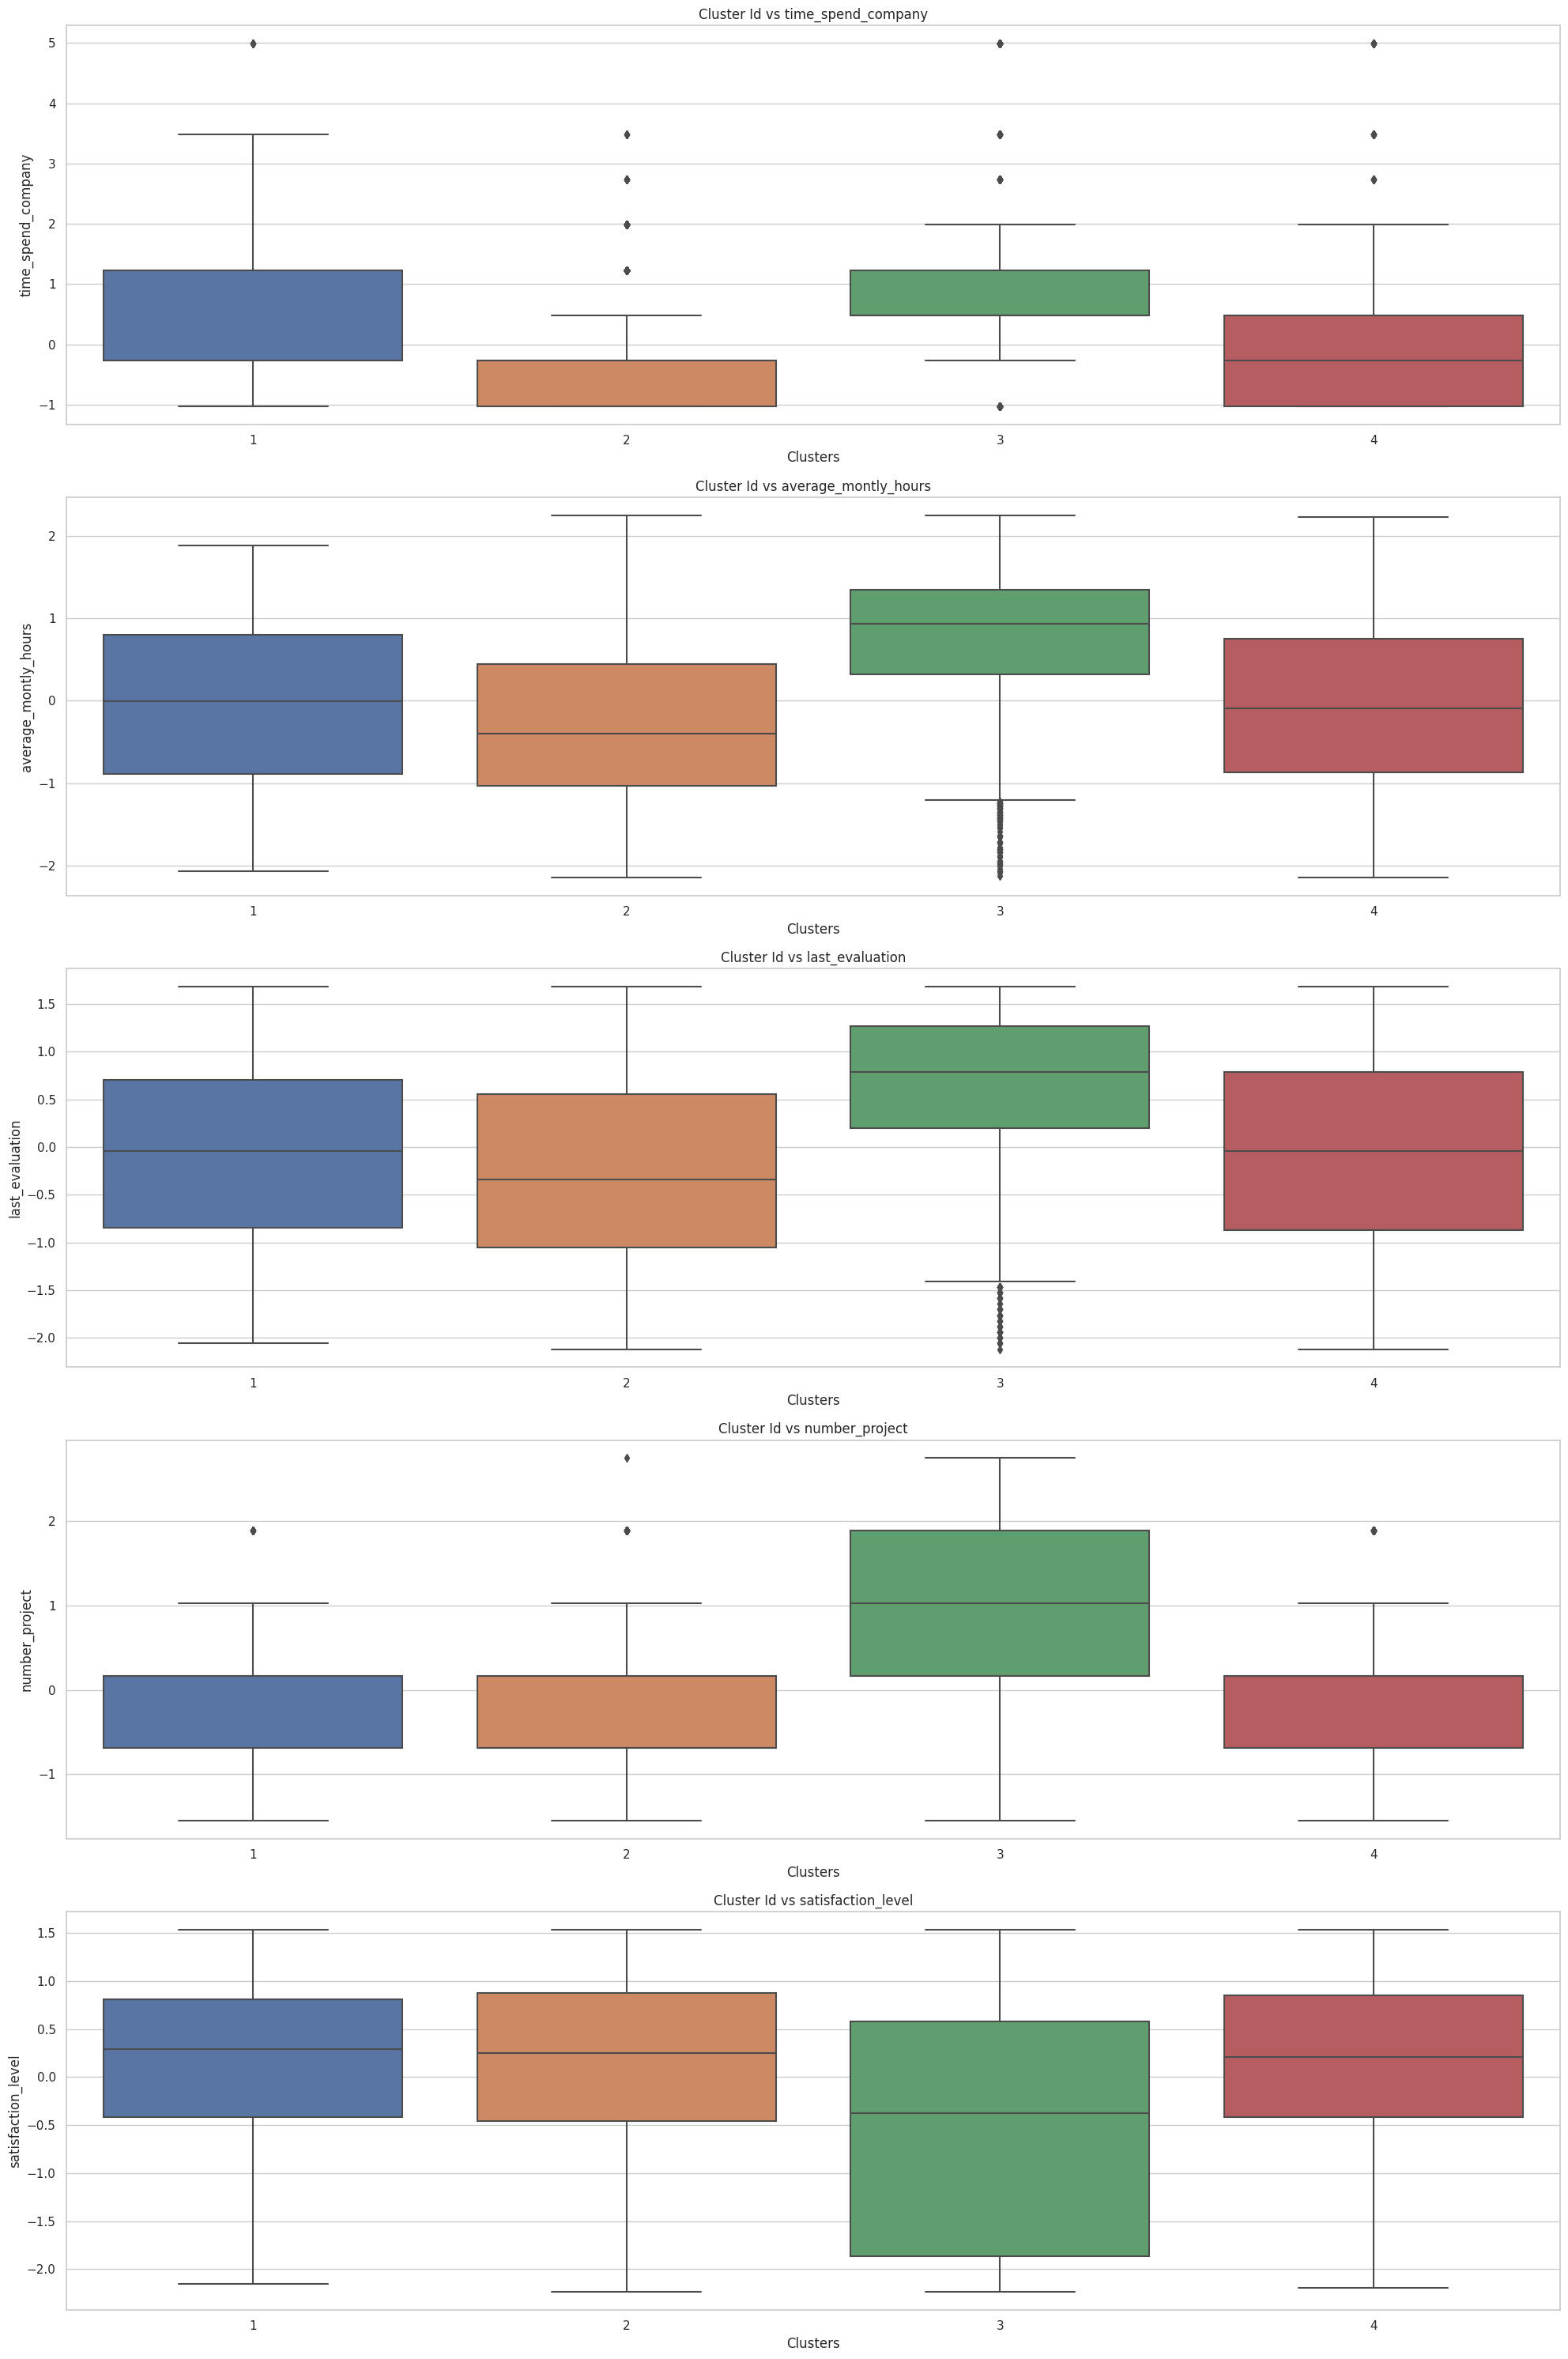

In [62]:
plt.figure(figsize=(20, 30))
# List of specific features
features = ['time_spend_company', 'average_montly_hours', 'last_evaluation', 'number_project', 'satisfaction_level']

# Loop through each feature
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x='Clusters', y=feature, data=df_cluster)
    plt.title(f'Cluster Id vs {feature}')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## 5. Predictive Model Building

### Preprocessing

In [63]:
X = df.drop("left", axis=1)
y = df.left
print(y)
display(X)

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high
11996,0.74,0.95,5,266,10,0,1,management,high
11997,0.85,0.54,3,185,10,0,1,management,high
11998,0.33,0.65,3,172,10,0,1,marketing,high


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]


pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

## Choose the best ML model using LazyPredcit

# Lazy Predcit

In [67]:
!pip install lazypredict

In [68]:
from lazypredict.Supervised import LazyClassifier
from sklearn.pipeline import Pipeline

In [69]:
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  3%|▎         | 1/29 [00:00<00:15,  1.84it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9629012088370155, 'Balanced Accuracy': 0.9149398775333937, 'ROC AUC': 0.9149398775333938, 'F1 Score': 0.9621742264689599, 'Time taken': 0.5429201126098633}


  7%|▋         | 2/29 [00:00<00:10,  2.51it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9799916631929971, 'Balanced Accuracy': 0.9511125839056014, 'ROC AUC': 0.9511125839056013, 'F1 Score': 0.9797211433855137, 'Time taken': 0.2960042953491211}
{'Model': 'BernoulliNB', 'Accuracy': 0.8270112546894539, 'Balanced Accuracy': 0.547324756177624, 'ROC AUC': 0.547324756177624, 'F1 Score': 0.7850888141986263, 'Time taken': 0.04666256904602051}


 21%|██        | 6/29 [00:05<00:18,  1.23it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8357649020425177, 'Balanced Accuracy': 0.575502559916525, 'ROC AUC': 0.5755025599165251, 'F1 Score': 0.8013892994654606, 'Time taken': 4.171159505844116}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9620675281367236, 'Balanced Accuracy': 0.9363652929737718, 'ROC AUC': 0.9363652929737718, 'F1 Score': 0.9622351910708123, 'Time taken': 0.11529088020324707}
{'Model': 'DummyClassifier', 'Accuracy': 0.8328470195914964, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.756892583645126, 'Time taken': 0.030556201934814453}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9420591913297207, 'Balanced Accuracy': 0.9054172626491828, 'ROC AUC': 0.905417262649183, 'F1 Score': 0.9425912339259133, 'Time taken': 0.04743218421936035}


 31%|███       | 9/29 [00:06<00:12,  1.59it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9758232596915382, 'Balanced Accuracy': 0.9406370210609611, 'ROC AUC': 0.9406370210609613, 'F1 Score': 0.9754169205851531, 'Time taken': 1.2562198638916016}
{'Model': 'GaussianNB', 'Accuracy': 0.8370154230929554, 'Balanced Accuracy': 0.7785697168490187, 'ROC AUC': 0.7785697168490187, 'F1 Score': 0.8463225607180497, 'Time taken': 0.0449519157409668}


 38%|███▊      | 11/29 [00:07<00:09,  1.94it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9512296790329304, 'Balanced Accuracy': 0.9198924610395932, 'ROC AUC': 0.9198924610395932, 'F1 Score': 0.9515855062121998, 'Time taken': 0.5070505142211914}


 41%|████▏     | 12/29 [00:20<00:49,  2.92s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.9499791579824927, 'Balanced Accuracy': 0.9201383428316097, 'ROC AUC': 0.9201383428316097, 'F1 Score': 0.9504618770943758, 'Time taken': 13.290942192077637}


 45%|████▍     | 13/29 [00:39<01:40,  6.26s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.9503959983326385, 'Balanced Accuracy': 0.9203885930818598, 'ROC AUC': 0.92038859308186, 'F1 Score': 0.9508514880372927, 'Time taken': 18.68574619293213}


 48%|████▊     | 14/29 [00:39<01:12,  4.86s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8345143809920801, 'Balanced Accuracy': 0.5946844600211184, 'ROC AUC': 0.5946844600211184, 'F1 Score': 0.8080836027963695, 'Time taken': 0.23517870903015137}


 55%|█████▌    | 16/29 [00:41<00:40,  3.12s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.8357649020425177, 'Balanced Accuracy': 0.5535766439756464, 'ROC AUC': 0.5535766439756464, 'F1 Score': 0.7914424400783725, 'Time taken': 2.07267165184021}
{'Model': 'LogisticRegression', 'Accuracy': 0.830762817840767, 'Balanced Accuracy': 0.5615365989430827, 'ROC AUC': 0.5615365989430827, 'F1 Score': 0.7931728993231968, 'Time taken': 0.157440185546875}


 69%|██████▉   | 20/29 [00:41<00:10,  1.15s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.7603167986661109, 'Balanced Accuracy': 0.7115943874048611, 'ROC AUC': 0.7115943874048613, 'F1 Score': 0.7825343295906746, 'Time taken': 0.07958197593688965}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6777824093372239, 'Balanced Accuracy': 0.562381583578591, 'ROC AUC': 0.562381583578591, 'F1 Score': 0.7075248332529568, 'Time taken': 0.07875227928161621}
{'Model': 'Perceptron', 'Accuracy': 0.7982492705293872, 'Balanced Accuracy': 0.6795523703254376, 'ROC AUC': 0.6795523703254377, 'F1 Score': 0.8056470394218496, 'Time taken': 0.0436711311340332}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.924968736973739, 'Balanced Accuracy': 0.8911704722178537, 'ROC AUC': 0.8911704722178537, 'F1 Score': 0.9267584331391207, 'Time taken': 0.04973244667053223}


 83%|████████▎ | 24/29 [00:42<00:03,  1.61it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9795748228428511, 'Balanced Accuracy': 0.9478724360270495, 'ROC AUC': 0.9478724360270495, 'F1 Score': 0.9792428168532011, 'Time taken': 0.859246015548706}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8403501458941226, 'Balanced Accuracy': 0.5433731736724255, 'ROC AUC': 0.5433731736724255, 'F1 Score': 0.7875802387266173, 'Time taken': 0.04410052299499512}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8403501458941226, 'Balanced Accuracy': 0.5433731736724255, 'ROC AUC': 0.5433731736724255, 'F1 Score': 0.7875802387266173, 'Time taken': 0.0575108528137207}
{'Model': 'SGDClassifier', 'Accuracy': 0.8328470195914964, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.756892583645126, 'Time taken': 0.12315726280212402}


 90%|████████▉ | 26/29 [00:44<00:01,  1.57it/s]

{'Model': 'SVC', 'Accuracy': 0.9566486035848271, 'Balanced Accuracy': 0.9171659190362432, 'ROC AUC': 0.9171659190362431, 'F1 Score': 0.9564290286100442, 'Time taken': 1.213731288909912}


 97%|█████████▋| 28/29 [00:44<00:00,  2.14it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9791579824927052, 'Balanced Accuracy': 0.9486188183195664, 'ROC AUC': 0.9486188183195664, 'F1 Score': 0.978853507085272, 'Time taken': 0.204376220703125}
[LightGBM] [Info] Number of positive: 1590, number of negative: 8002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165763 -> initscore=-1.615957
[LightGBM] [Info] Start training from score -1.615957


100%|██████████| 29/29 [00:44<00:00,  1.54s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9808253438932889, 'Balanced Accuracy': 0.9506164518633347, 'ROC AUC': 0.9506164518633347, 'F1 Score': 0.9805242199281528, 'Time taken': 0.23862957954406738}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.98,0.95,0.95,0.98,0.30
LGBMClassifier,0.98,0.95,0.95,0.98,0.24
XGBClassifier,0.98,0.95,0.95,0.98,0.20
RandomForestClassifier,0.98,0.95,0.95,0.98,0.86
ExtraTreesClassifier,0.98,0.94,0.94,0.98,1.26
DecisionTreeClassifier,0.96,0.94,0.94,0.96,0.12
LabelSpreading,0.95,0.92,0.92,0.95,18.69
LabelPropagation,0.95,0.92,0.92,0.95,13.29
KNeighborsClassifier,0.95,0.92,0.92,0.95,0.51


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

In [71]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    # Make predictions on the test and training sets
    y_pred = model.predict(X_test) > 0.5
    y_train_pred = model.predict(X_train) > 0.5
    y_pred_p = model.predict(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot and display the confusion matrix for the test set with a specific color map
    cm_test = confusion_matrix(y_test, y_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    disp_test.plot(cmap='Greens', ax=axes[0])  # Change 'Greens' to your desired color map
    axes[0].set_title('Test Set Confusion Matrix')

    # Plot and display the confusion matrix for the training set with a specific color map
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    disp_train.plot(cmap='Blues', ax=axes[1])  # Change 'Blues' to your desired color map
    axes[1].set_title('Training Set Confusion Matrix')

    plt.show()

    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_pred)

    print(f'''
_______________________Train Results_______________________-
{train_report}

_______________________Test Results_______________________
{test_report}
''')
    print('_______________________precision_recall_curve_______________________')
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_p)
    plt.plot(recalls, precisions, label='ANN')
    plt.xlabel('Recalls')
    plt.ylabel('Precisions')
    plt.title('Precision-Recall Curve')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred_p)
    roc_auc = auc(fpr, tpr)
    print('_______________________Receiver Operating Characteristic________________________________')

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

## 2. SVC

### Vanilla SVC model

In [72]:
from sklearn.svm import SVC

operations = [("encoder", column_trans), ("SVC", SVC(probability=True))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1963   35]
 [  45  356]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.91      0.89      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7886  116]
 [ 144 1446]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8002
           1       0.93      0.91      0.92      1590

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592



In [73]:
from sklearn.model_selection import cross_validate

In [74]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-left': make_scorer(precision_score, average=None, labels=[1]),
            'recall-left': make_scorer(recall_score, average=None, labels = [1]),
            'f1-left': make_scorer(f1_score, average=None, labels = [1])}

SVC_model = Pipeline(steps=operations)
scores = cross_validate(SVC_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.97
train_accuracy         0.97
test_precision-left    0.91
train_precision-left   0.92
test_recall-left       0.90
train_recall-left      0.91
test_f1-left           0.91
train_f1-left          0.92
dtype: float64

In [75]:
#the SVM model with balanced data

operations = [("encoder", column_trans), ("SVC", SVC(class_weight='balanced'))]

SVM_pipe_model_balanced = Pipeline(steps=operations)

SVM_pipe_model_balanced.fit(X_train, y_train)

eval_metric(SVM_pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[1935   63]
 [  41  360]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1998
           1       0.85      0.90      0.87       401

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7748  254]
 [ 110 1480]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8002
           1       0.85      0.93      0.89      1590

    accuracy                           0.96      9592
   macro avg       0.92      0.95      0.93      9592
weighted avg       0.96      0.96      0.96      9592



###  SVC Model GridsearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [78]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-left': make_scorer(precision_score, average=None, labels=[1]),
            'recall-left': make_scorer(recall_score, average=None, labels = [1]),
            'f1-left': make_scorer(f1_score, average=None, labels = [1])}

In [79]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels = [1]),
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [80]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments ']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [81]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('svc',
                 SVC(C=0.5, class_weight='balanced', gamma=0.01,
                     random_state=101))])

In [82]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.93
mean_train_score   0.93
Name: 2, dtype: object

In [83]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[1821  177]
 [  35  366]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1998
           1       0.67      0.91      0.78       401

    accuracy                           0.91      2399
   macro avg       0.83      0.91      0.86      2399
weighted avg       0.93      0.91      0.92      2399


Train_Set
[[7267  735]
 [ 117 1473]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8002
           1       0.67      0.93      0.78      1590

    accuracy                           0.91      9592
   macro avg       0.83      0.92      0.86      9592
weighted avg       0.93      0.91      0.92      9592



In [84]:
pip install scikit-plot

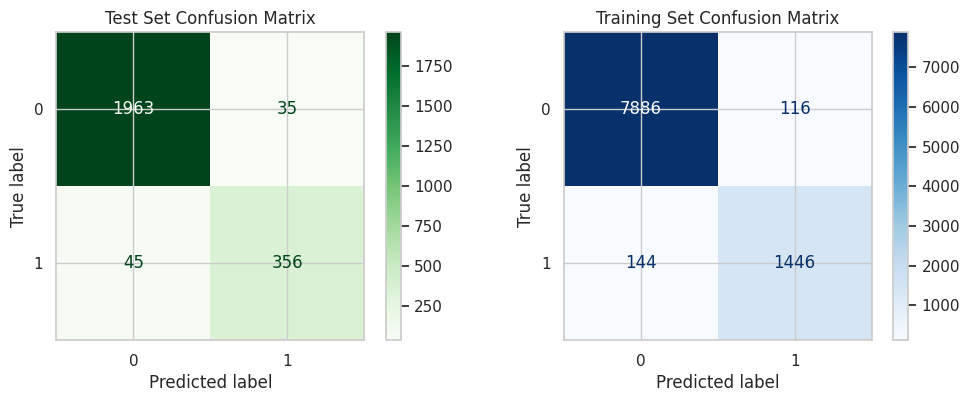


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8002
           1       0.93      0.91      0.92      1590

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.91      0.89      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399


_______________________precision_recall_curve_______________________


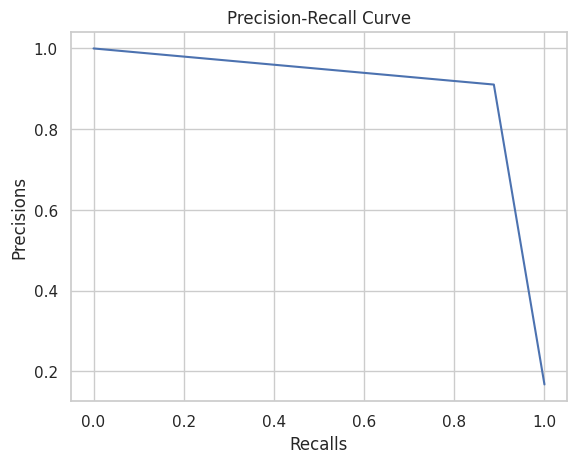

_______________________Receiver Operating Characteristic________________________________


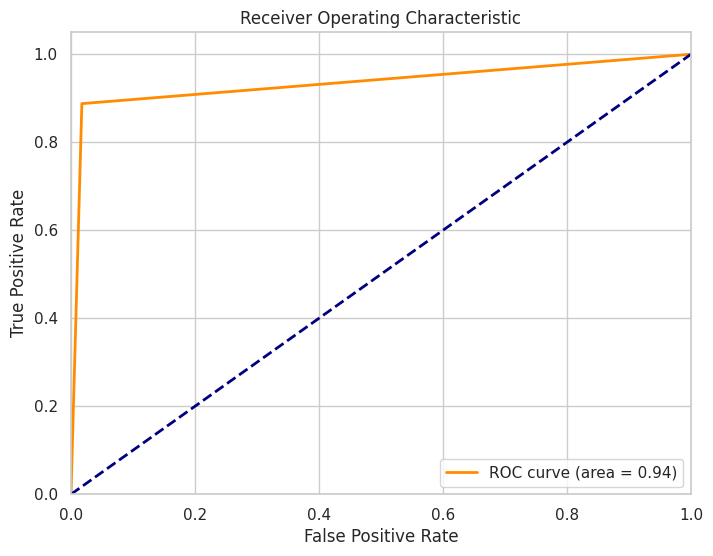

In [85]:
evaluate_classification_model(SVC_model, X_train, y_train, X_test, y_test)

In [86]:
from sklearn.metrics import recall_score, f1_score, average_precision_score

y_pred_proba = SVM_pipe_model.predict_proba(X_test)
y_test_dummies = pd.get_dummies(y_test)

y_pred = SVM_pipe_model.predict(X_test)
svc_rec_left = recall_score(y_test, y_pred, labels=[1], average=None)
svc_f1_left = f1_score(y_test, y_pred, labels=[1], average=None)
svc_AP_left = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## 3. RF

### Vanilla RF Model

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

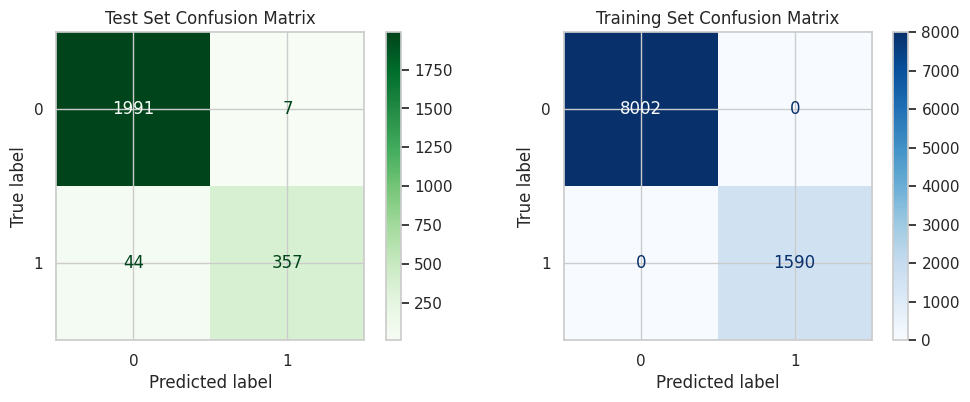


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      1.00      1.00      1590

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


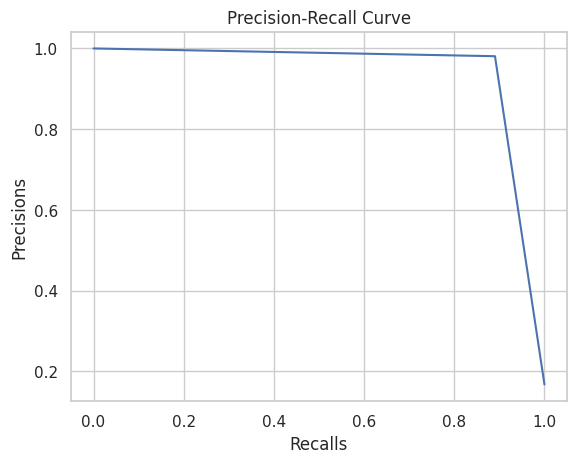

_______________________Receiver Operating Characteristic________________________________


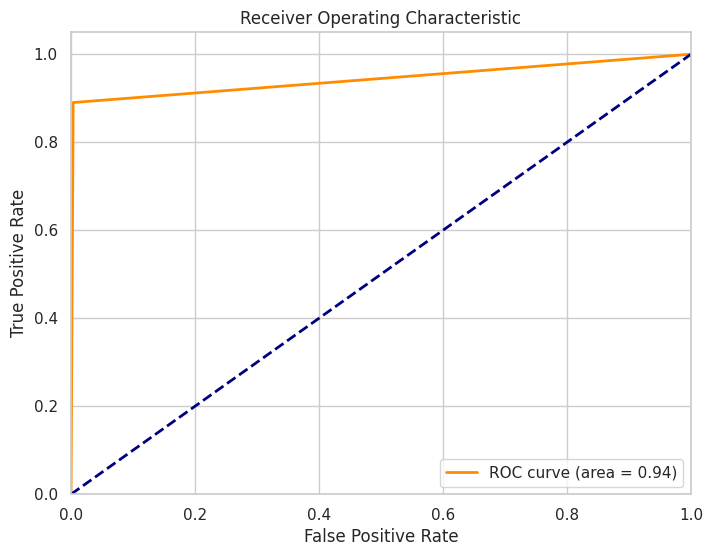

In [178]:
evaluate_classification_model(RF_model, X_train, y_train, X_test, y_test)

In [90]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

RF_model = Pipeline(steps=operations)

scores = cross_validate(RF_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.99
train_accuracy         1.00
test_precision-left    0.99
train_precision-left   1.00
test_recall-left       0.92
train_recall-left      1.00
test_f1-left           0.95
train_f1-left          1.00
dtype: float64

In [91]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=make_scorer(recall_score, average=None, labels = [1]),
                             n_jobs = -1,
                             verbose=2,
                             cv=10)

In [92]:
rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


KeyboardInterrupt: ignored

In [ ]:
evaluate_classification_model(rf_grid_model, X_train, y_train, X_test, y_test)

In [181]:
y_pred_proba = RF_model.predict_proba(X_test)
y_test_dummies = pd.get_dummies(y_test)

y_pred = RF_model.predict(X_test)
rf_rec_left = recall_score(y_test, y_pred, labels=[1], average=None)
rf_f1_left = f1_score(y_test, y_pred, labels=[1], average=None)
rf_AP_left = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Deep Learning

In [116]:
import tensorflow as tf

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [146]:
# First way to create the model using the Sequential API
# Add this to the model:
'''  Input(shape=X_train_transformed.shape[1]),
        Dense(units=64, activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=16, activation="relu"),
        Dense(units=1, activation="sigmoid"),'''

model = Sequential()
model.add(Dense(units=64, activation="relu", input_dim=X_train_transformed.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [147]:
# If input_dim is not provided when the model was created, this will return an error
# because input dimensions are needed to calculate the number of parameters.
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1216      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(9, 64) dtype=float32, numpy=
 array([[ 0.2205371 ,  0.08325464, -0.06700724, -0.03377694,  0.10605776,
         -0.24189049,  0.13872787, -0.27977547, -0.20723872, -0.2717878 ,
          0.14191467, -0.16394453,  0.20802948,  0.05016169,  0.20039165,
         -0.0953349 , -0.11644235,  0.05351207,  0.26525423, -0.04653889,
         -0.12542735, -0.06650245, -0.10513686,  0.149086  ,  0.07145056,
          0.11266375,  0.05645657,  0.13296464,  0.02469999, -0.16216497,
         -0.08890751,  0.01176983, -0.17374292,  0.09919482, -0.11583744,
          0.24502185, -0.23620035,  0.2289708 , -0.10890554,  0.20334503,
          0.11917549,  0.1544328 ,  0.14776269,  0.19303861,  0.05846542,
         -0.07327107,  0.10896501, -0.08342469,  0.2663313 ,  0.24270621,
         -0.00420606, -0.23830034, -0.27167213, -0.0229257 , -0.02238032,
         -0.12208991,  0.01941961, -0.1569181 ,  0.12099525, -0.0312669 ,
          0.05777365,  0.06584722, -0.14688

In [129]:
y_train

6426     0
288      1
5051     0
11132    0
3687     0
        ..
11973    0
5200     0
5399     0
861      1
7279     0
Name: left, Length: 9592, dtype: int64

In [154]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['Recall', 'Precision'])

In [155]:
model.fit(x=X_train_transformed, y=y_train, batch_size=32, epochs=250)

Epoch 1/250
300/300 [==============================] - 3s 4ms/step - loss: 0.2395 - recall: 0.6132
Epoch 2/250
300/300 [==============================] - 1s 3ms/step - loss: 0.1294 - recall: 0.8874
Epoch 3/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1151 - recall: 0.9000
Epoch 4/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1080 - recall: 0.8956
Epoch 5/250
300/300 [==============================] - 1s 2ms/step - loss: 0.1033 - recall: 0.9000
Epoch 6/250
300/300 [==============================] - 1s 3ms/step - loss: 0.0976 - recall: 0.9038
Epoch 7/250
300/300 [==============================] - 2s 7ms/step - loss: 0.0935 - recall: 0.9025
Epoch 8/250
300/300 [==============================] - 1s 5ms/step - loss: 0.0900 - recall: 0.9000
Epoch 9/250
300/300 [==============================] - 1s 3ms/step - loss: 0.0867 - recall: 0.9044
Epoch 10/250
300/300 [==============================] - 1s 3ms/step - loss: 0.0846 - recall: 0.9019
Epoch 11/

75/75 [==============================] - 0s 2ms/step


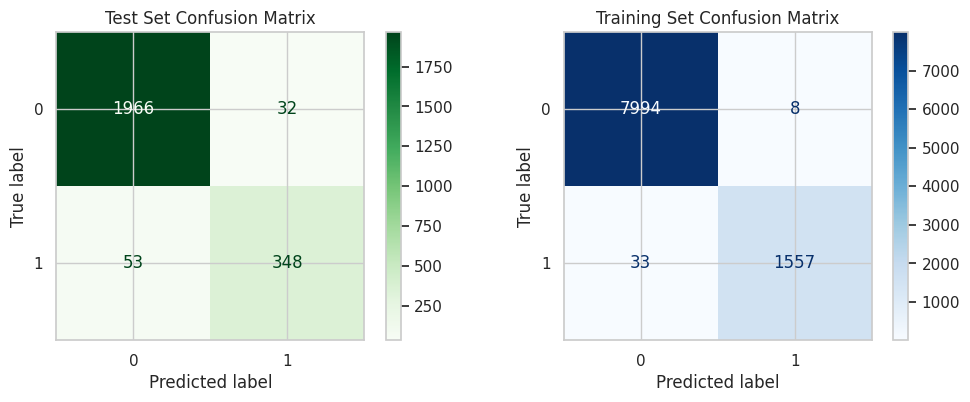


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       0.99      0.98      0.99      1590

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1998
           1       0.92      0.87      0.89       401

    accuracy                           0.96      2399
   macro avg       0.94      0.93      0.94      2399
weighted avg       0.96      0.96      0.96      2399


_______________________precision_recall_curve_______________________


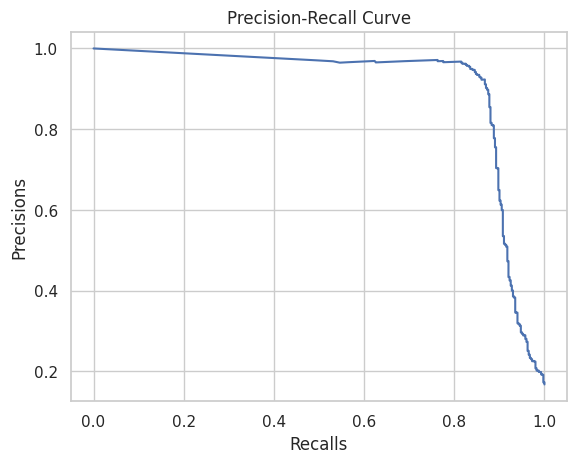

_______________________Receiver Operating Characteristic________________________________


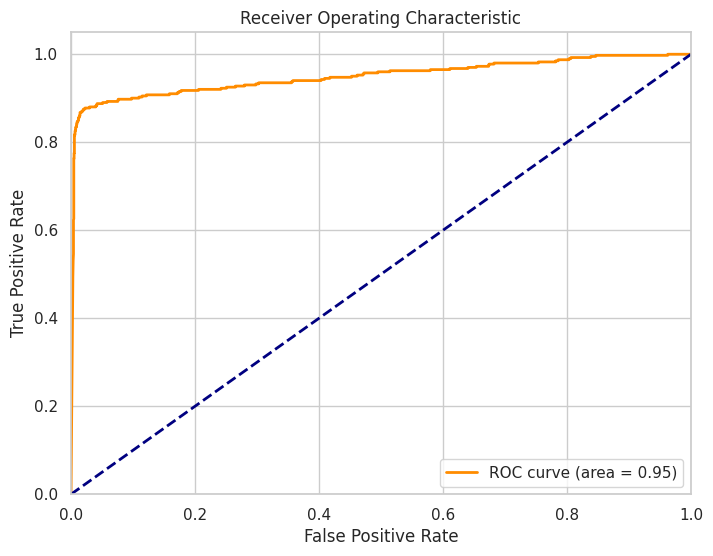

In [189]:
evaluate_classification_model(model, X_train_transformed, y_train, X_test_transformed, y_test)

In [193]:
y_pred = model.predict(X_test_transformed)

DL_AP = average_precision_score(y_test, y_pred)
DL_f1 = f1_score(y_test, y_pred > 0.5)  # Use probabilities and apply a threshold for binary predictions
DL_rec = recall_score(y_test, y_pred > 0.5)

75/75 [==============================] - 0s 2ms/step


The Deep Learning model is overfitted.

## XGB Boost

In [99]:
from xgboost import XGBClassifier

operations_gb = [
    ("column_trans", column_trans),
    ("XGB_model", XGBClassifier()),
]

XGB_model = Pipeline(steps=operations_gb)

XGB_model.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('X...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

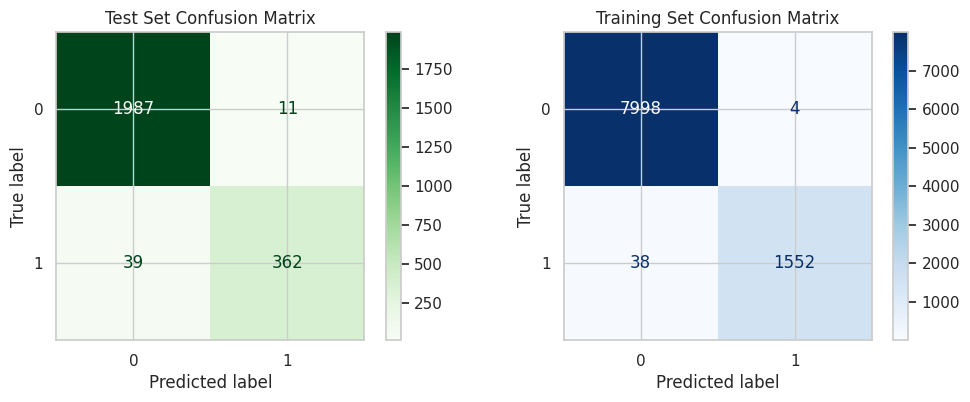


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      0.98      0.99      1590

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


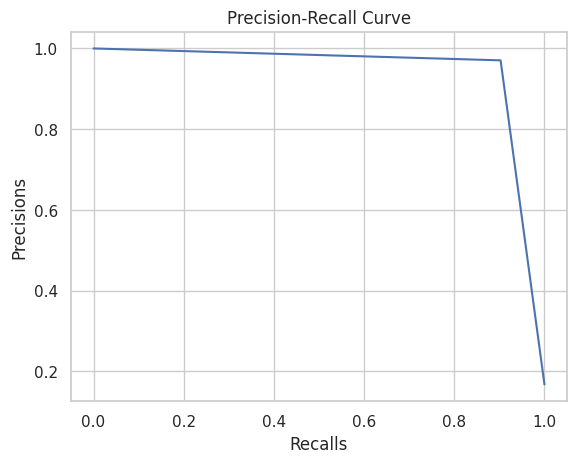

_______________________Receiver Operating Characteristic________________________________


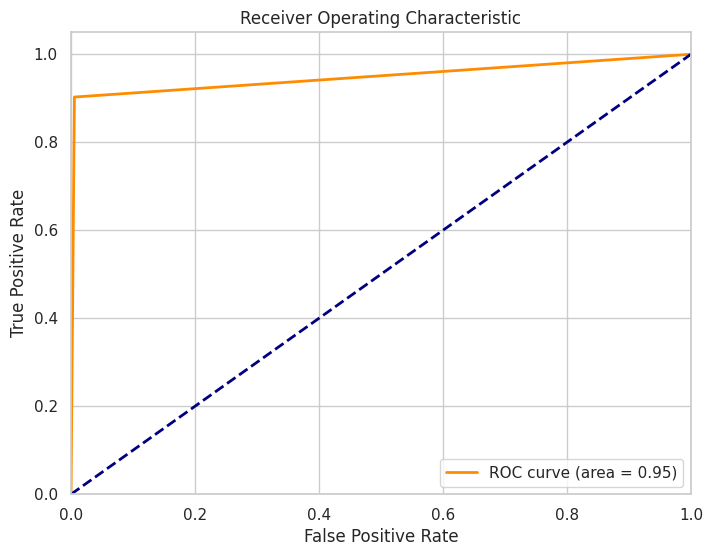

In [100]:
evaluate_classification_model(XGB_model, X_train, y_train, X_test, y_test)

In [107]:
 xgb_classifier = XGBClassifier(gamma=0.5)
 xgb_classifier.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

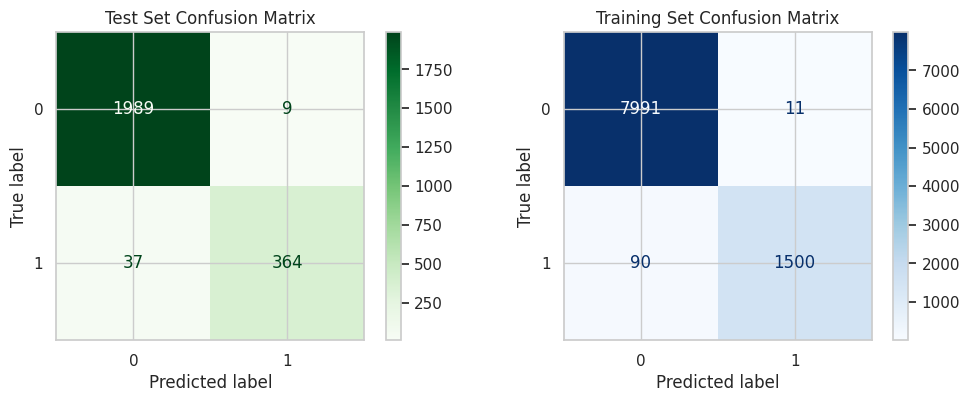


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8002
           1       0.99      0.94      0.97      1590

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


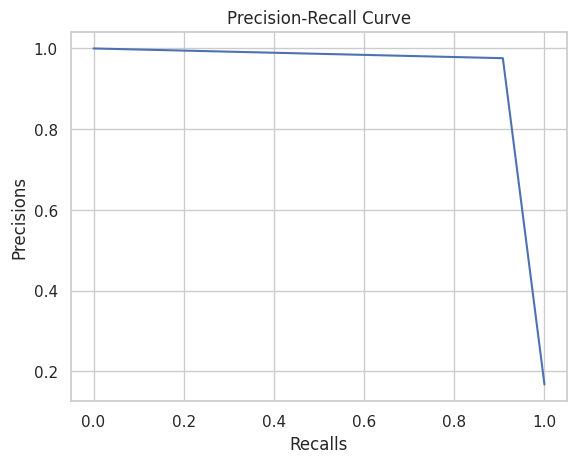

_______________________Receiver Operating Characteristic________________________________


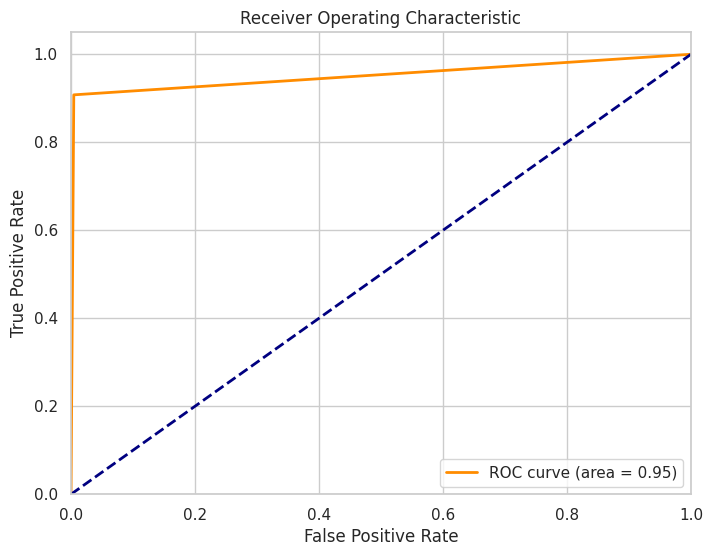

In [108]:
evaluate_classification_model(xgb_classifier, X_train_transformed, y_train, X_test_transformed, y_test)

In [111]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}

pipe_model_gb = Pipeline([("preprocessor", column_trans), ("xgboost", xgb)])

param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model_gb, param_grid, cv=5, scoring='neg_root_mean_squared_error',
    return_train_score=True, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.7s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.9s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.1s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Departments ']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])],
                                                          verbose_f...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [112]:
print(grid_search.best_params_)

{'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 4, 'xgboost__n_estimators': 100, 'xgboost__reg_alpha': 0.25, 'xgboost__subsample': 1}


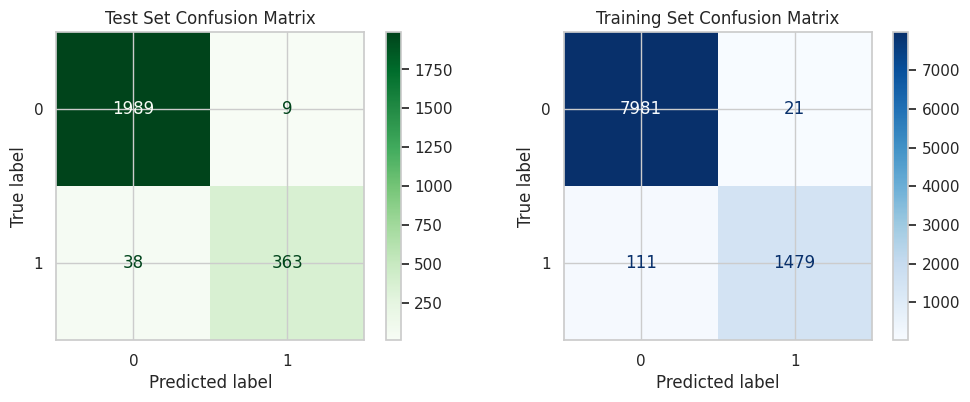


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8002
           1       0.99      0.93      0.96      1590

    accuracy                           0.99      9592
   macro avg       0.99      0.96      0.97      9592
weighted avg       0.99      0.99      0.99      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


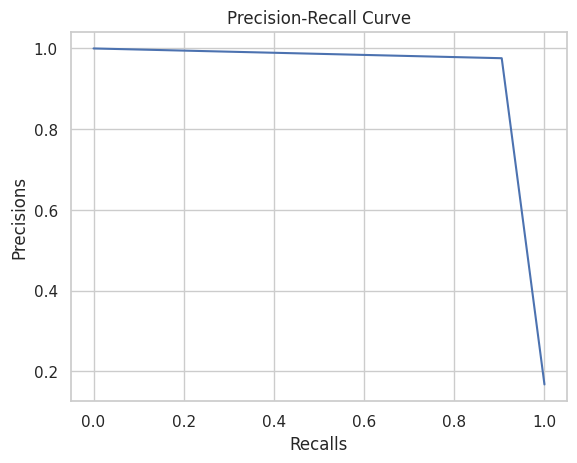

_______________________Receiver Operating Characteristic________________________________


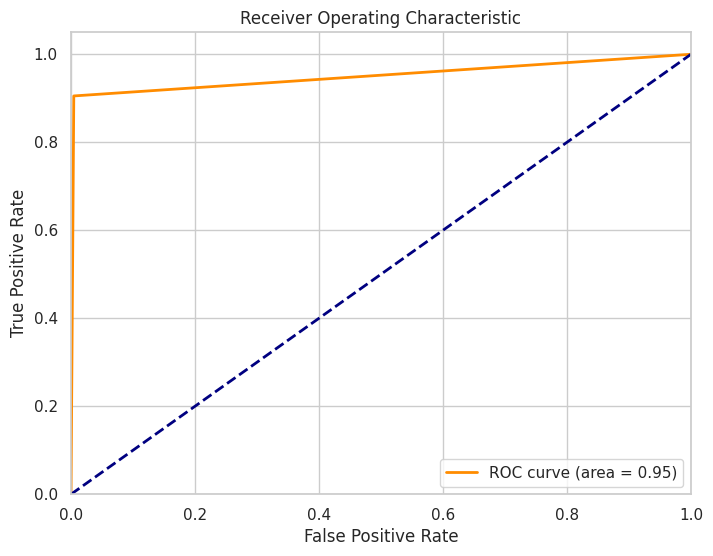

In [113]:
evaluate_classification_model(grid_search, X_train, y_train, X_test, y_test)

In [114]:
import pickle
pickle.dump(xgb_classifier, open('xgb_model_gamma.pkl', 'wb'))

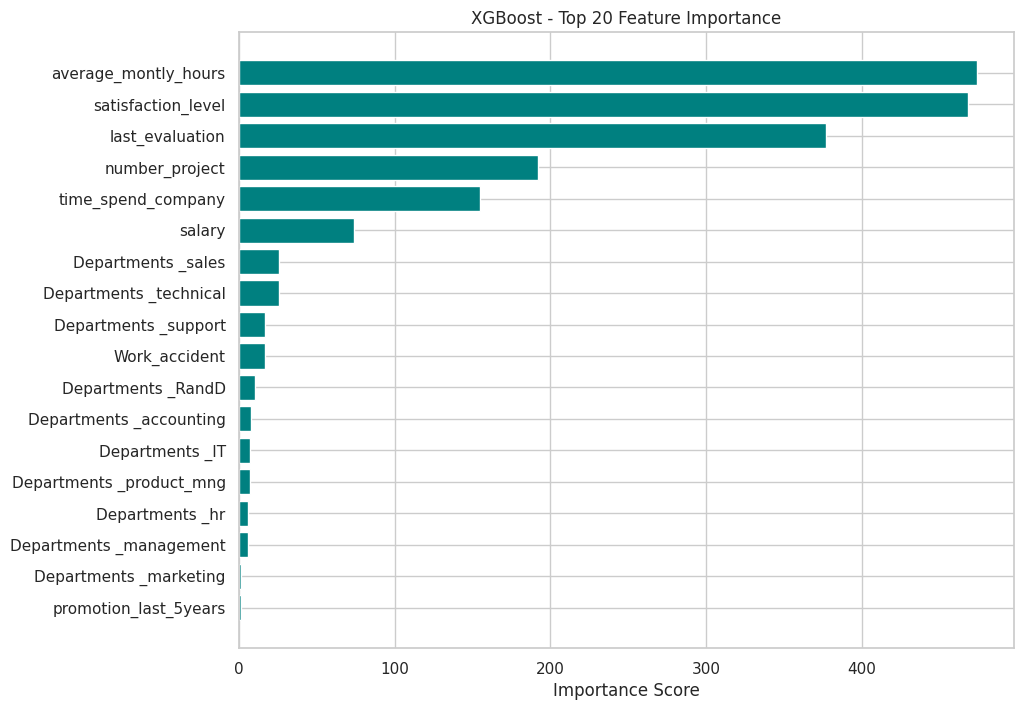

In [104]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [206]:
features[:6]

('average_montly_hours',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'time_spend_company',
 'salary')

In [110]:
scores = cross_validate(xgb_classifier,
                        X_train_transformed,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.98
train_accuracy         0.99
test_precision-left    0.98
train_precision-left   0.99
test_recall-left       0.93
train_recall-left      0.94
test_f1-left           0.95
train_f1-left          0.97
dtype: float64

In [182]:
from sklearn.metrics import recall_score, f1_score, average_precision_score

y_pred_proba = xgb_classifier.predict_proba(X_test_transformed)
y_test_dummies = pd.get_dummies(y_test)

y_pred = xgb_classifier.predict(X_test_transformed)
xgb_rec_left = recall_score(y_test, y_pred, labels=[1], average=None)
xgb_f1_left = f1_score(y_test, y_pred, labels=[1], average=None)
xgb_AP_left = average_precision_score(y_test_dummies[1], y_pred_proba[:, 1])

## Model comparison

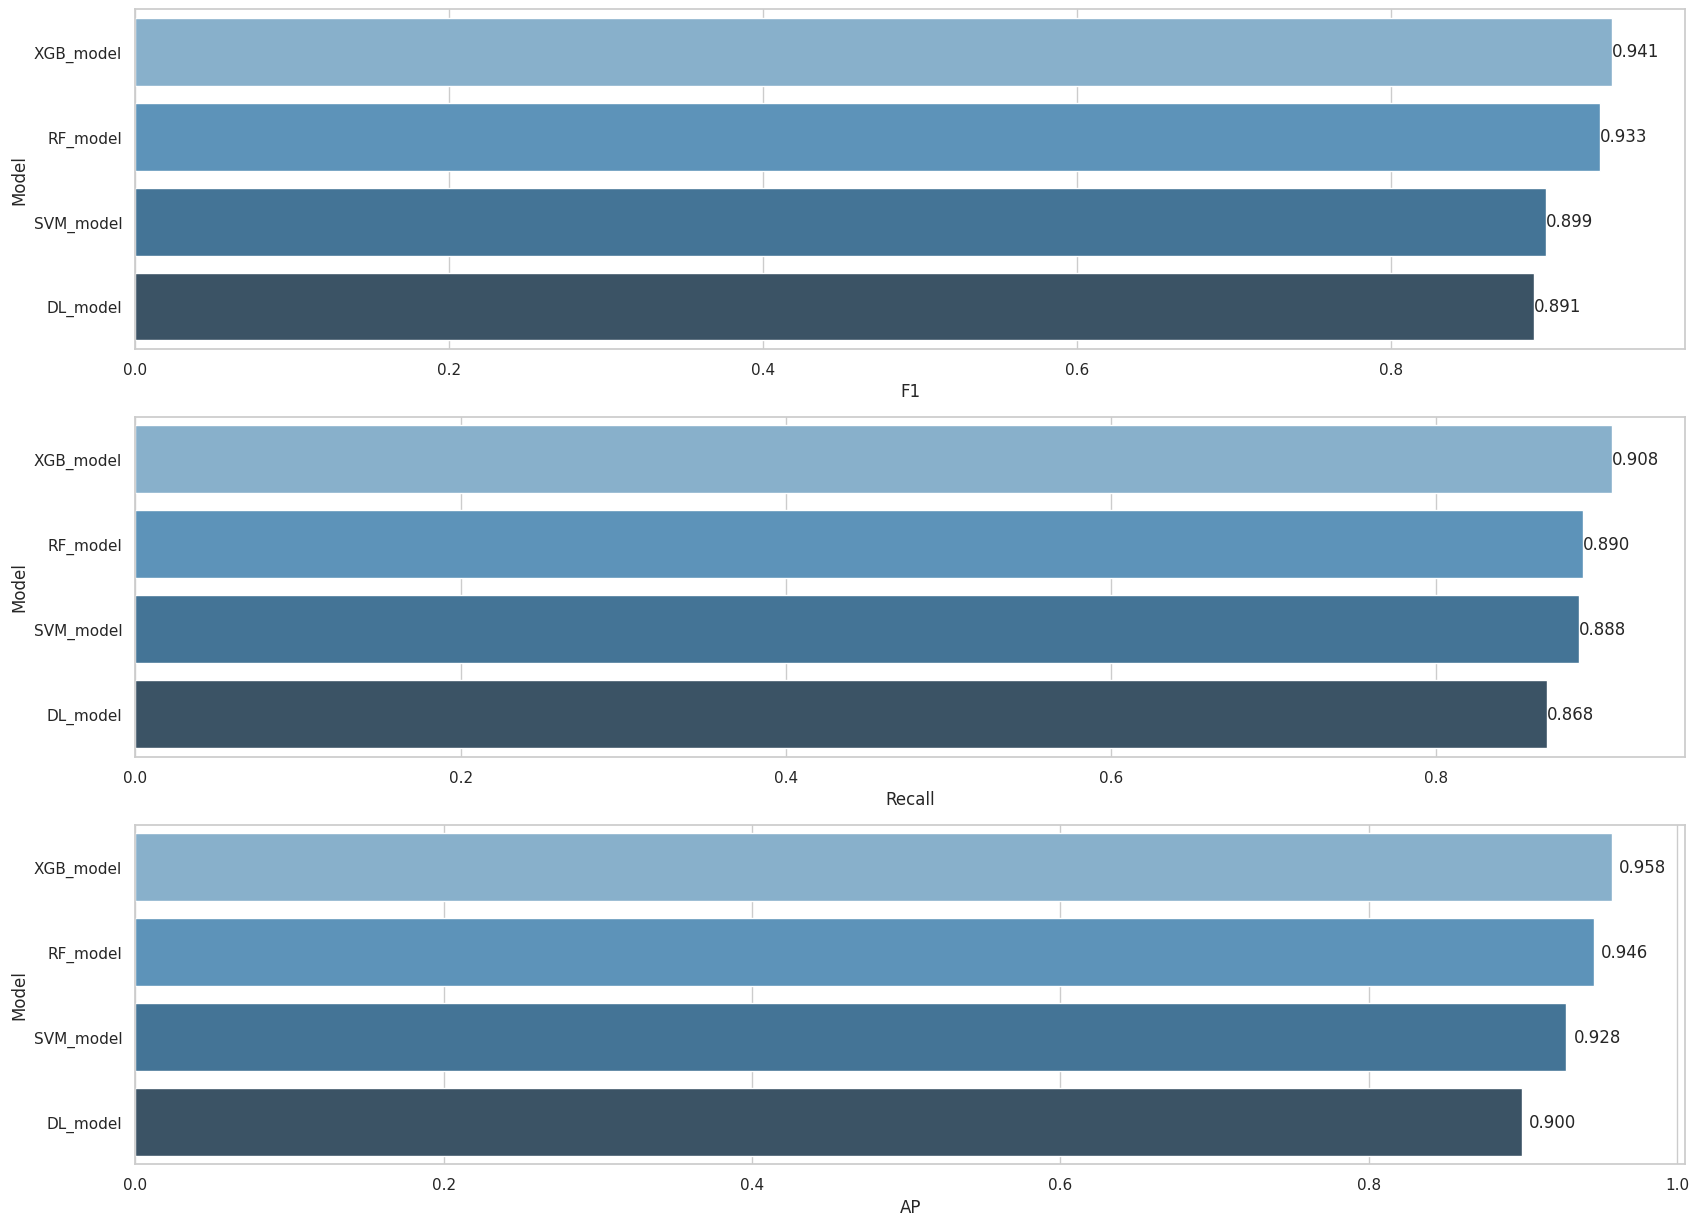

In [202]:

compare = pd.DataFrame(
    {
        "Model": ["RF_model", "XGB_model", "SVM_model", "DL_model"],
        "F1": [rf_f1_left[0], xgb_f1_left[0], svc_f1_left[0], DL_f1],
        "Recall": [rf_rec_left[0], xgb_rec_left[0], svc_rec_left[0], DL_rec],
        "AP": [rf_AP_left, xgb_AP_left, svc_AP_left, DL_AP],
    }
)

plt.figure(figsize=(20, 15))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare_ap = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare_ap, palette="Blues_d")
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.3f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center')
plt.show()

Conclusion: The XGBoost model is the best model for this dataset. We are going to use gamma as a hyperparameter only.

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [208]:
X_final = df[['average_montly_hours',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'time_spend_company',
 'salary', 'Departments ']]
y_final = df.left

In [211]:
X_final.head()

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,salary,Departments
0,157,0.38,0.53,2,3,low,sales
1,262,0.80,0.86,5,6,medium,sales
2,272,0.11,0.88,7,4,medium,sales
3,223,0.72,0.87,5,5,low,sales
4,159,0.37,0.52,2,3,low,sales


In [210]:
y_final

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [217]:
#train test split
X_train, X_test, y_train, y_test  = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [218]:
cat_onehot = ["Departments "]

ordinal = ['salary']
ord_for_salary = ['low', 'medium', 'high']

In [219]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [ord_for_salary],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,ordinal),
                        remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [220]:
X_test

,average_montly_hours,satisfaction_level,last_evaluation,number_project,time_spend_company,salary,Departments
397,293,0.09,0.79,6,5,low,sales
3107,154,0.74,0.96,4,4,medium,support
9331,212,0.81,0.97,4,2,low,sales
357,149,0.37,0.54,2,3,low,support
1326,272,0.10,0.77,6,4,low,accounting
...,...,...,...,...,...,...,...
9322,212,0.70,0.74,3,3,low,sales
10440,111,0.87,0.73,5,4,high,management
3077,181,0.81,0.66,3,2,medium,sales
6113,146,0.70,0.98,4,3,low,marketing


In [221]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]


pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [239]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Departments ']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

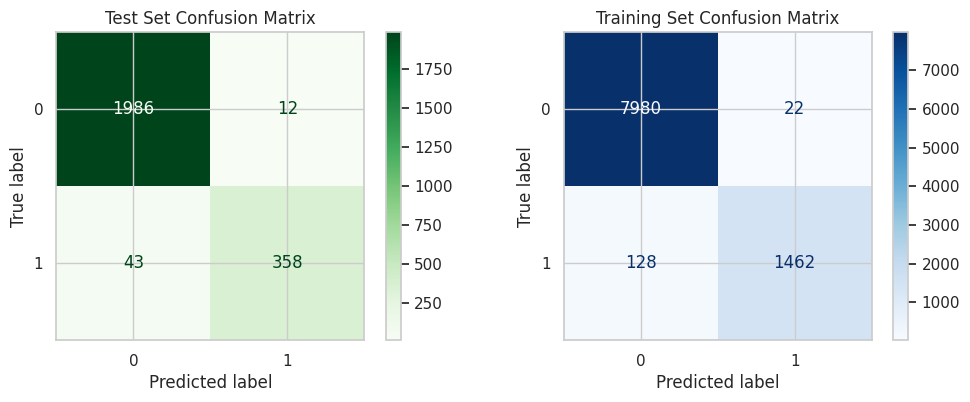


_______________________Train Results_______________________-
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8002
           1       0.99      0.92      0.95      1590

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592


_______________________Test Results_______________________
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399


_______________________precision_recall_curve_______________________


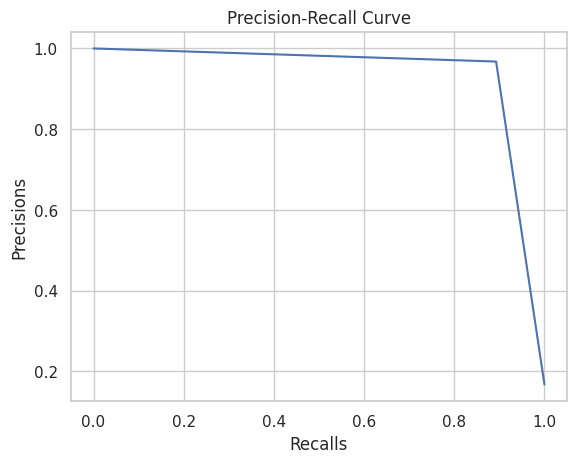

_______________________Receiver Operating Characteristic________________________________


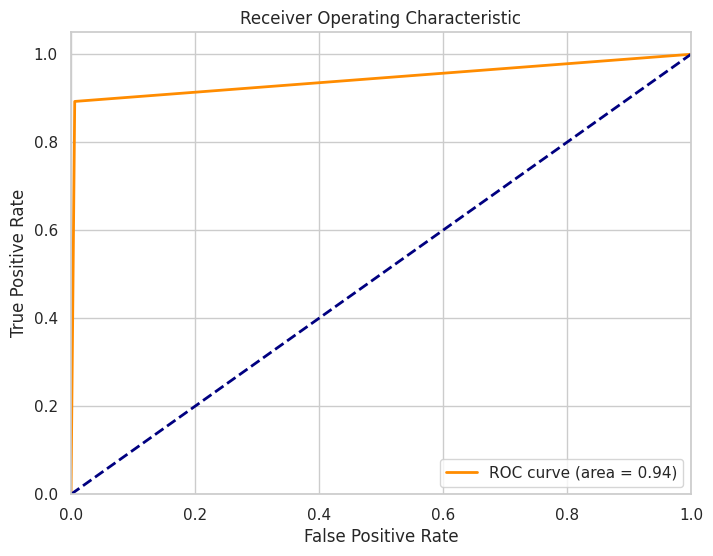

In [240]:
evaluate_classification_model(RF_model, X_train, y_train, X_test, y_test)

In [242]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model = Pipeline(steps=operations)

scores = cross_validate(RF_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.98
train_accuracy         0.98
test_precision-left    0.98
train_precision-left   0.98
test_recall-left       0.91
train_recall-left      0.92
test_f1-left           0.94
train_f1-left          0.95
dtype: float64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___